Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
请输入开始时间 (HH:MM:SS, 直接回车表示从视频开始): 
请输入结束时间 (HH:MM:SS, 直接回车表示到视频结束): 00:00:29
处理范围: 帧 0 到 869 (FPS: 29.97)
请输入ROI区域 (格式: x1,y1,x2,y2): 301,420,756,982
ROI区域: (301, 420) 到 (756, 982), 尺寸: 455x562


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36215 (\N{CJK UNIFIED IDEOGRAPH-8D77}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24103 (\N{CJK UNIFIED IDEOGRAPH-5E27}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas

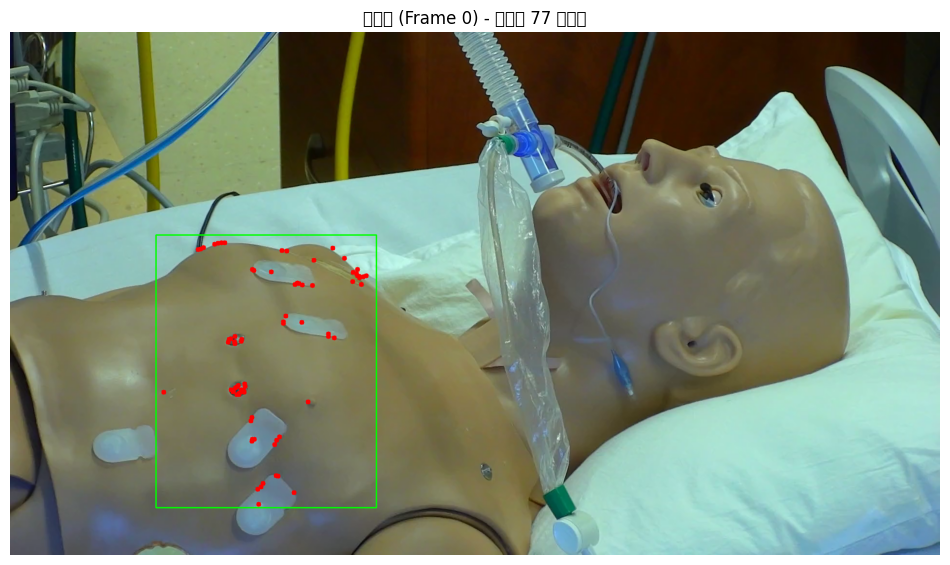

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install opencv-python
!apt-get install ffmpeg
!pip install scipy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.integrate import cumulative_trapezoid
import re
# %matplotlib inline

# 配置参数
SIGMA = 1
# 请取消注释您要处理的视频
input_video_path = "/content/drive/MyDrive/Ventilator Test 1/20250519-121302-v28773-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 2/20250519-075354-v28769-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 3/20250520-131415-v28850-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 4/20250521-070426-v28927-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 5/20250522-082753-v29004-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 6/20250528-110409-v29462-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 7/20250529-120810-v29543-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 8/20250530-111445-v29620-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 9/20250602-075756-v29847-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 10/20250602-115844-v29851-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 11/20250603-071828-v29928-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 12/20250603-105741-v29932-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 13/20250605-073749-v30090-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 14/20250609-132228-v30398-15.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 15/20250611-085608-v30547-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 16/20250611-122313-v30551-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 17/20250616-090340-v30915-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 18/20250616-124624-v30919-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 19/20250617-085020-v30997-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 20/20250619-081602-v31147-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 21/20250623-123112-v31447-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 22/20250625-072122-v31595-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 23/20250625-112723-v31599-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 24/20250626-071256-v31675-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 25/20250626-111734-v31679-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 26/20250627-074121-v31756-30.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 27/20250630-073355-v31975-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 28/20250630-120037-v31979-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 29/20250701-070948-v32055-13.mp4"
# input_video_path = "/content/drive/MyDrive/Ventilator Test 30/20250701-121203-v32059-13.mp4"

# 函数：将HH:MM:SS时间转换为秒
def time_to_seconds(time_str):
    if not time_str:
        return None
    parts = list(map(int, time_str.split(':')))
    if len(parts) == 3:  # HH:MM:SS
        return parts[0] * 3600 + parts[1] * 60 + parts[2]
    elif len(parts) == 2:  # MM:SS
        return parts[0] * 60 + parts[1]
    else:  # SS
        return parts[0]

# 函数：将秒数转换为帧号
def seconds_to_frame(seconds, fps):
    return int(seconds * fps)

# 函数：显示带ROI和角点的帧
def show_frame_with_roi_and_corners(frame, roi_coords, corners=None, title="Frame"):
    display_frame = frame.copy()
    x1, y1, x2, y2 = roi_coords

    # 绘制ROI区域
    cv2.rectangle(display_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 绘制角点
    if corners is not None:
        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(display_frame, (int(x), int(y)), 5, (0, 0, 255), -1)

    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(display_frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

##############################################################################
# 第一部分：角点检测和轨迹记录
##############################################################################

# 获取用户输入的时间范围
start_time_input = input("请输入开始时间 (HH:MM:SS, 直接回车表示从视频开始): ")
end_time_input = input("请输入结束时间 (HH:MM:SS, 直接回车表示到视频结束): ")

# 初始化视频参数
cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 计算开始和结束帧
start_frame = 0
end_frame = total_frames - 1

if start_time_input:
    start_seconds = time_to_seconds(start_time_input)
    start_frame = seconds_to_frame(start_seconds, fps)

if end_time_input:
    end_seconds = time_to_seconds(end_time_input)
    end_frame = seconds_to_frame(end_seconds, fps)

print(f"处理范围: 帧 {start_frame} 到 {end_frame} (FPS: {fps:.2f})")

# 获取视频尺寸
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 手动输入ROI区域
roi_input = input("请输入ROI区域 (格式: x1,y1,x2,y2): ")
roi_coords = list(map(int, roi_input.split(',')))
x1, y1, x2, y2 = roi_coords
roi_width = x2 - x1
roi_height = y2 - y1

print(f"ROI区域: ({x1}, {y1}) 到 ({x2}, {y2}), 尺寸: {roi_width}x{roi_height}")

# 设置起始帧
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
ret, start_frame_img = cap.read()
if not ret:
    raise ValueError("无法读取视频起始帧")

# 创建ROI mask
mask = np.zeros((height, width), dtype=np.uint8)
mask[y1:y2, x1:x2] = 255
gray_start = cv2.cvtColor(start_frame_img, cv2.COLOR_BGR2GRAY)

# Shi-Tomasi参数
feature_params = dict(
    maxCorners=500,
    qualityLevel=0.001,
    minDistance=3,
    blockSize=9,
    gradientSize=3,
    useHarrisDetector=1,
    k=0.04
)

# 在起始帧上检测角点
p0 = cv2.goodFeaturesToTrack(gray_start, mask=mask, **feature_params)

# 显示起始帧上的ROI和角点
show_frame_with_roi_and_corners(start_frame_img, roi_coords, p0,
                               title=f"起始帧 (Frame {start_frame}) - 检测到 {len(p0) if p0 is not None else 0} 个角点")


In [ ]:
# # 调试功能：允许用户输入特定时间查看ROI和角点
# debug_time = input("是否需要调试？输入时间 (HH:MM:SS) 或直接回车跳过: ")
# while debug_time:
#     debug_seconds = time_to_seconds(debug_time)
#     debug_frame = seconds_to_frame(debug_seconds, fps)

#     # 确保调试帧在视频范围内
#     debug_frame = max(0, min(debug_frame, total_frames - 1))

#     # 创建新的视频捕获对象用于调试
#     cap_debug = cv2.VideoCapture(input_video_path)
#     cap_debug.set(cv2.CAP_PROP_POS_FRAMES, debug_frame)
#     ret, debug_frame_img = cap_debug.read()
#     cap_debug.release()

#     if ret:
#         debug_gray = cv2.cvtColor(debug_frame_img, cv2.COLOR_BGR2GRAY)
#         debug_p0 = cv2.goodFeaturesToTrack(debug_gray, mask=mask, **feature_params)
#         show_frame_with_roi_and_corners(debug_frame_img, roi_coords, debug_p0,
#                                        title=f"调试帧 (Frame {debug_frame}, Time: {debug_seconds:.2f}s) - 检测到 {len(debug_p0) if debug_p0 is not None else 0} 个角点")
#     else:
#         print(f"无法读取调试帧 {debug_frame}")

#     # 询问是否需要继续调试
#     debug_time = input("是否需要继续调试？输入时间 (HH:MM:SS) 或直接回车继续: ")

# 重置主视频流到起始帧
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

True

In [ ]:
# LK参数
lk_params = dict(winSize=(25, 25),
                maxLevel=3,
                criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 轨迹记录数据结构
trajectories = {}
all_frame_times = []
all_frame_points = []
current_point_id = 0

# 初始化点ID和颜色
if p0 is not None:
    current_ids = list(range(current_point_id, current_point_id + len(p0)))
    current_point_id += len(p0)
    color = np.random.randint(0, 255, (len(p0), 3))
    initial_positions = p0.copy()
else:
    current_ids = []
    initial_positions = np.empty((0, 1, 2), dtype=np.float32)
    print("未检测到角点！请调整ROI参数")

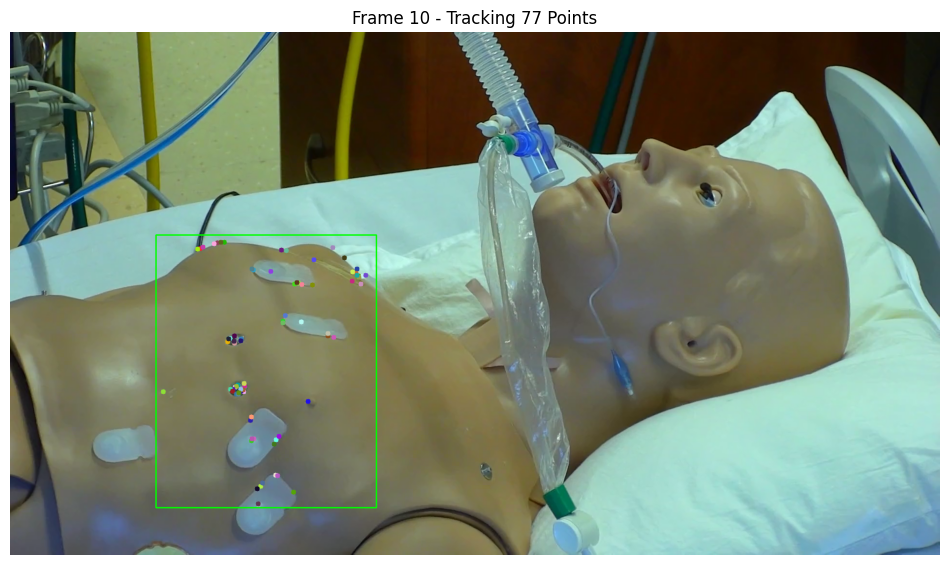

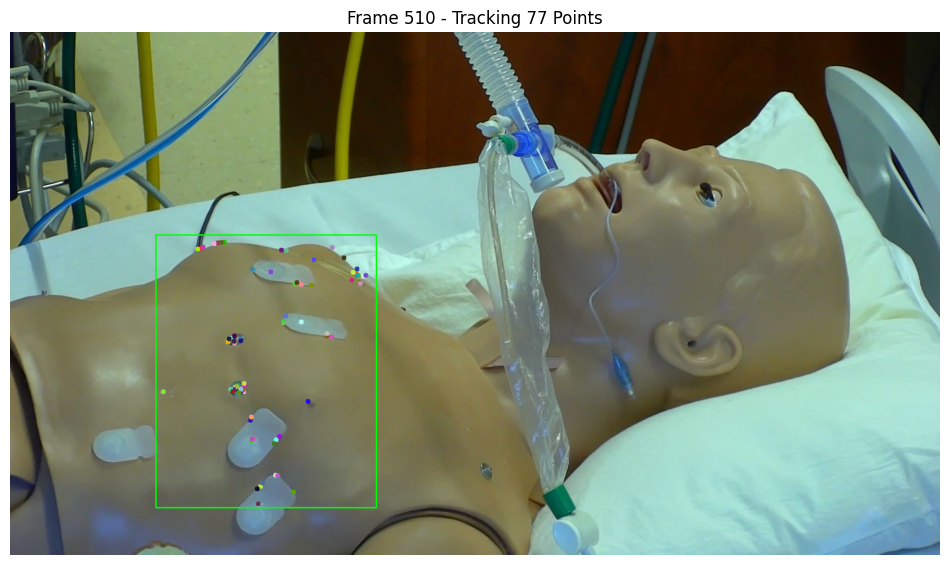

In [ ]:
# 主处理循环
frame_count = start_frame
gray_prev = gray_start.copy()

while cap.isOpened() and frame_count <= end_frame:
    ret, frame = cap.read()
    if not ret:
        break

    current_time = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    if p0 is not None and len(p0) > 0:
        p1, st, _ = cv2.calcOpticalFlowPyrLK(gray_prev, gray, p0, None, **lk_params)
    else:
        p1, st = None, None

    # 更新轨迹数据
    frame_points = []
    if p1 is not None and st is not None:
        valid = st.ravel() == 1
        good_new = p1[valid]
        good_old = p0[valid]
        current_ids = [current_ids[i] for i in range(len(valid)) if valid[i]]
        initial_positions = initial_positions[valid]

        # 计算位移
        delta_x = good_new[:, 0, 0] - initial_positions[:, 0, 0]
        delta_y = good_new[:, 0, 1] - initial_positions[:, 0, 1]
        delta_d = np.sqrt(delta_x**2 + delta_y**2)

        # 记录每个点的数据
        for i in range(len(current_ids)):
            point_id = current_ids[i]
            dx, dy, dd = delta_x[i], delta_y[i], delta_d[i]
            frame_points.append((point_id, dx, dy, dd))

            if point_id not in trajectories:
                trajectories[point_id] = {'times': [], 'dx': [], 'dy': [], 'dd': []}
            trajectories[point_id]['times'].append(current_time)
            trajectories[point_id]['dx'].append(dx)
            trajectories[point_id]['dy'].append(dy)
            trajectories[point_id]['dd'].append(dd)

    all_frame_times.append(current_time)
    all_frame_points.append(frame_points)

    # 每500帧显示角点检测结果 (从第10帧开始)
    if frame_count % 500 == 10:
        # 创建可视化帧
        vis_frame = frame.copy()
        if good_new is not None:
            for i, point in enumerate(good_new):
                x, y = point.ravel()
                cv2.circle(vis_frame, (int(x), int(y)), 5, color[i % len(color)].tolist(), -1)

        # 绘制ROI区域
        cv2.rectangle(vis_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(vis_frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {frame_count} - Tracking {len(current_ids)} Points")
        plt.axis('off')
        plt.show()

    # 更新前一帧数据
    gray_prev = gray.copy()
    p0 = good_new.reshape(-1, 1, 2) if valid is not None and sum(valid) > 0 else None
    frame_count += 1

cap.release()

共检测到 77 个轨迹点


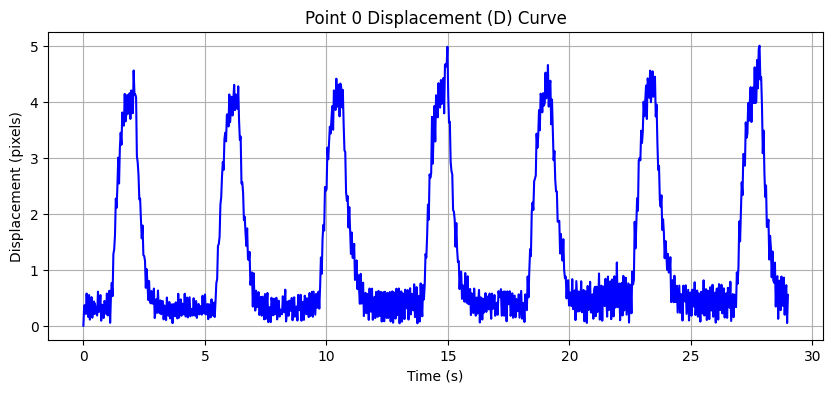

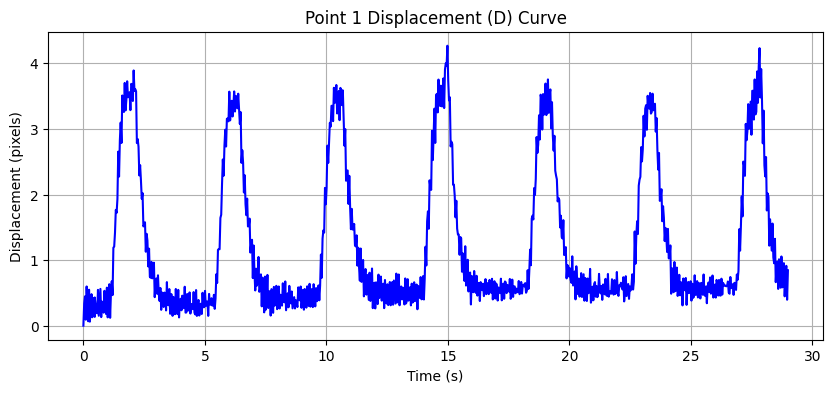

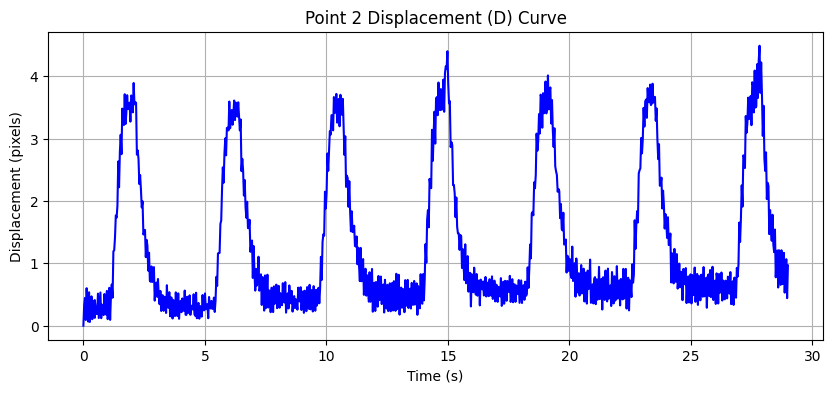

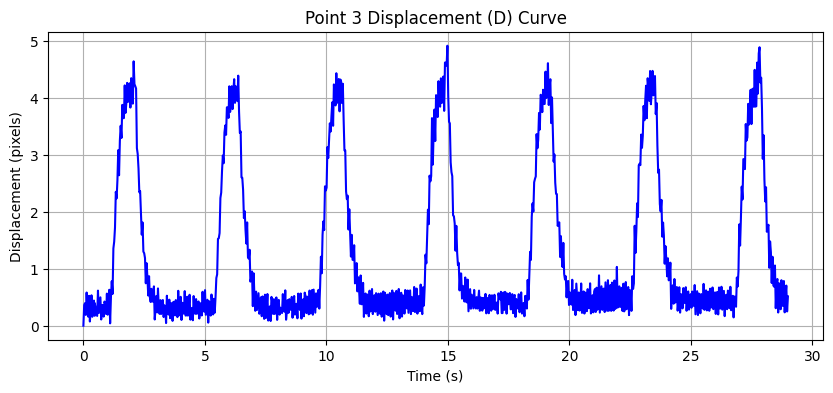

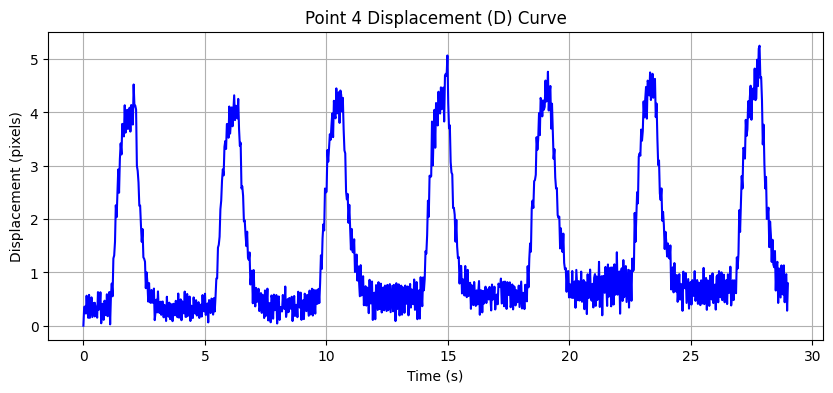

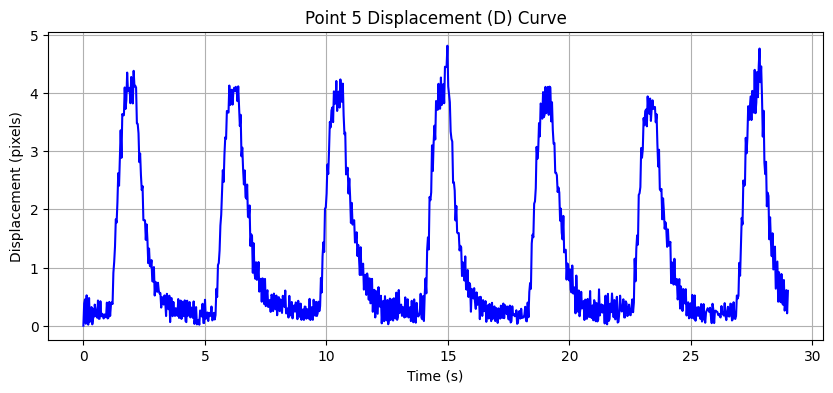

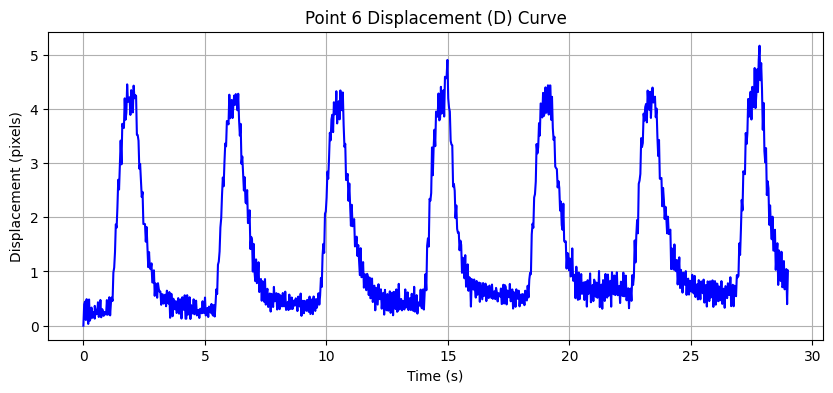

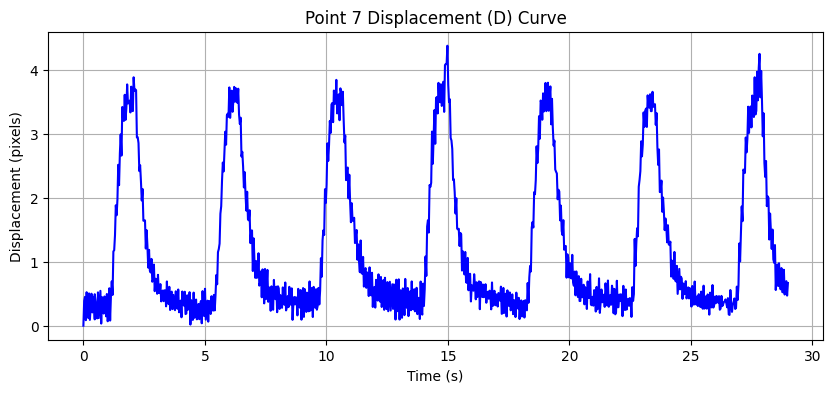

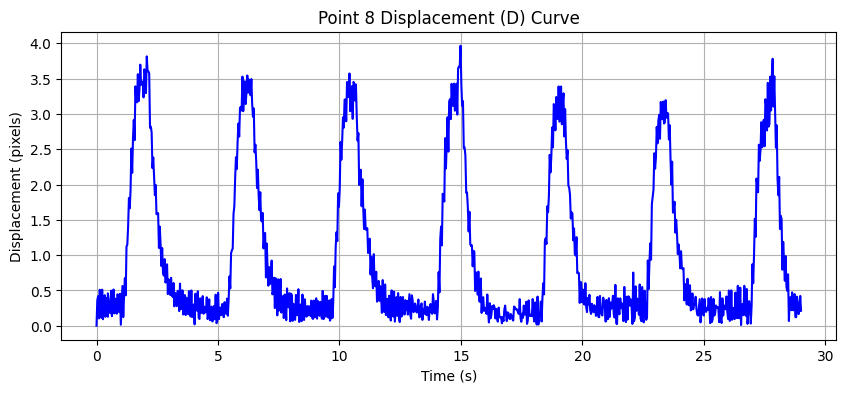

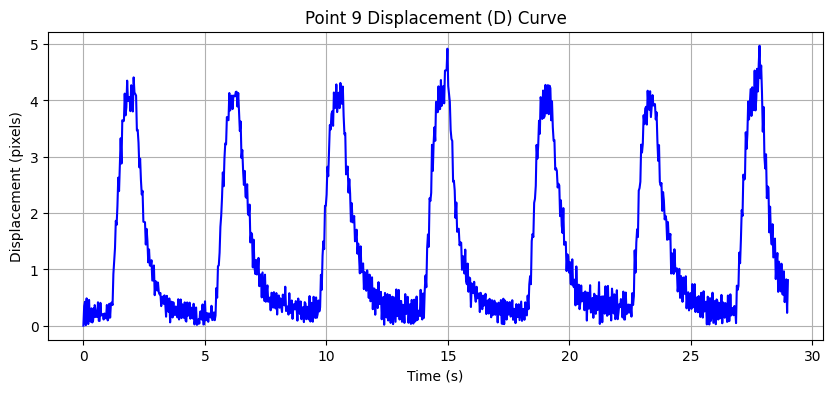

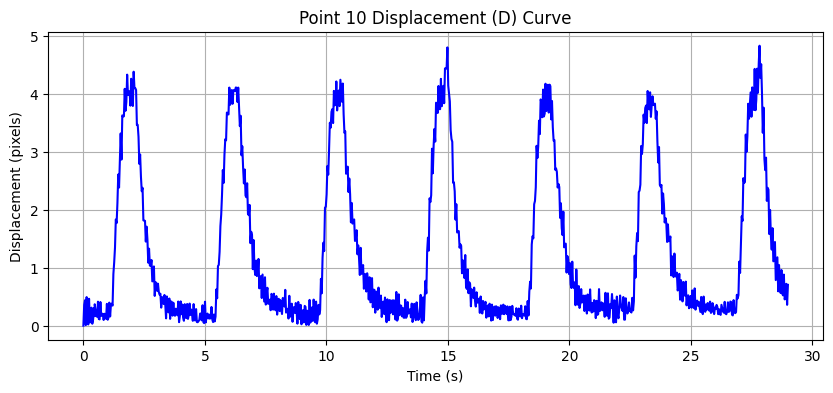

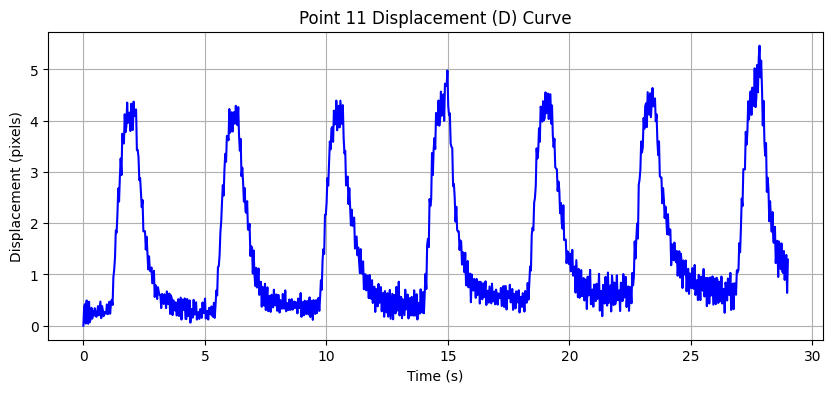

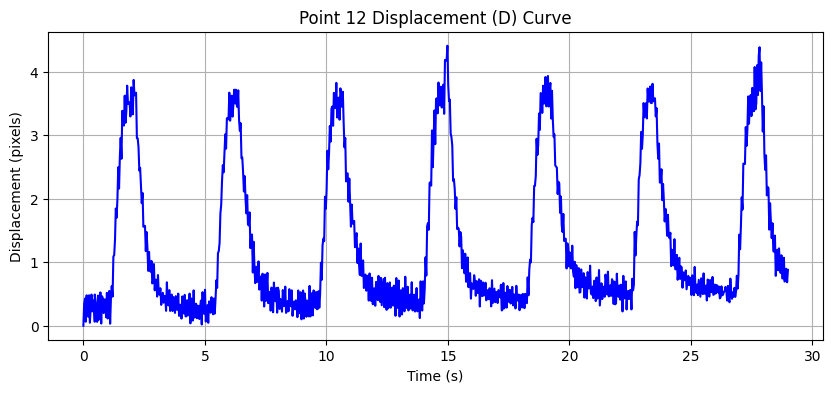

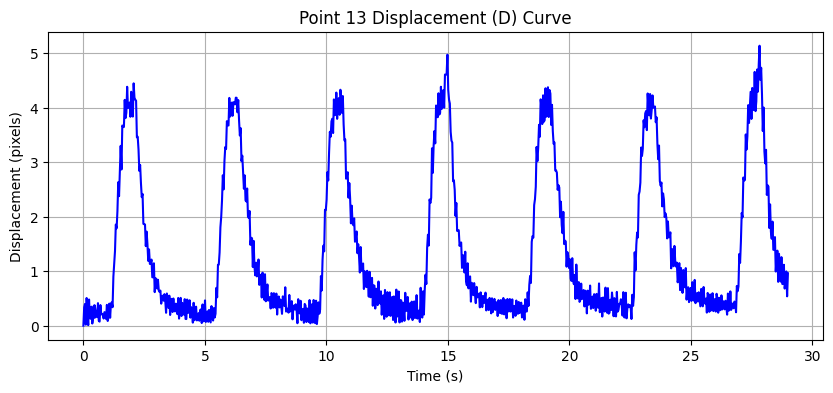

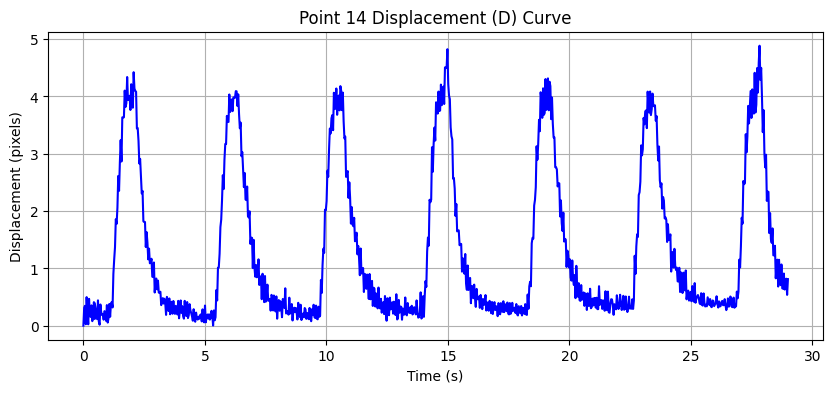

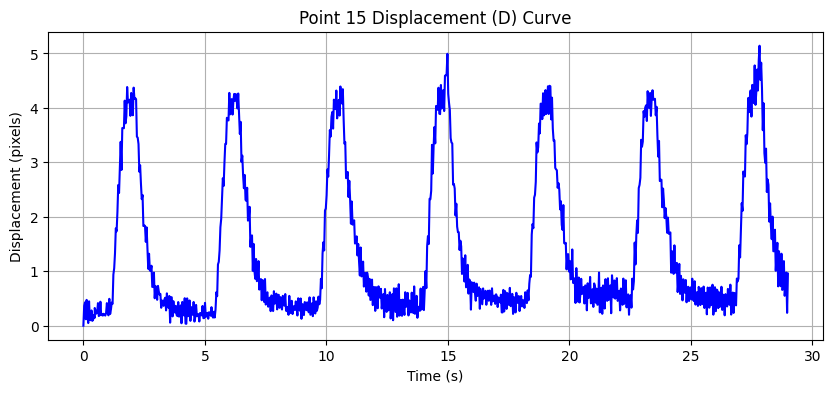

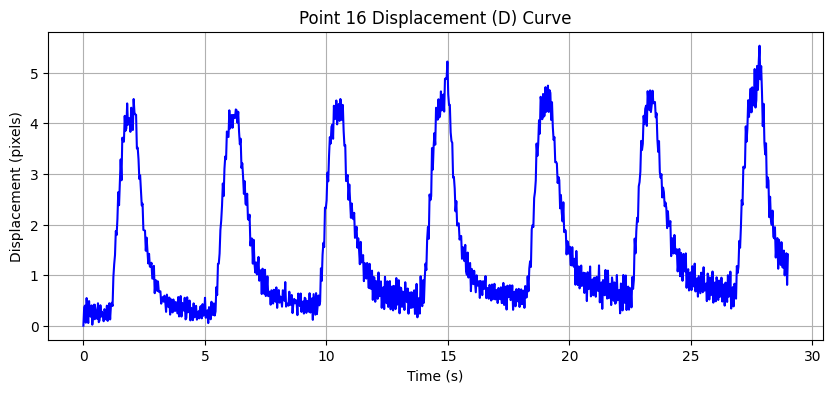

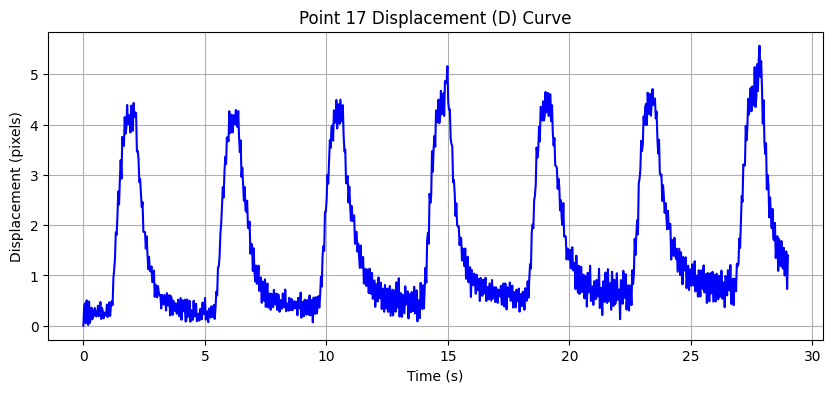

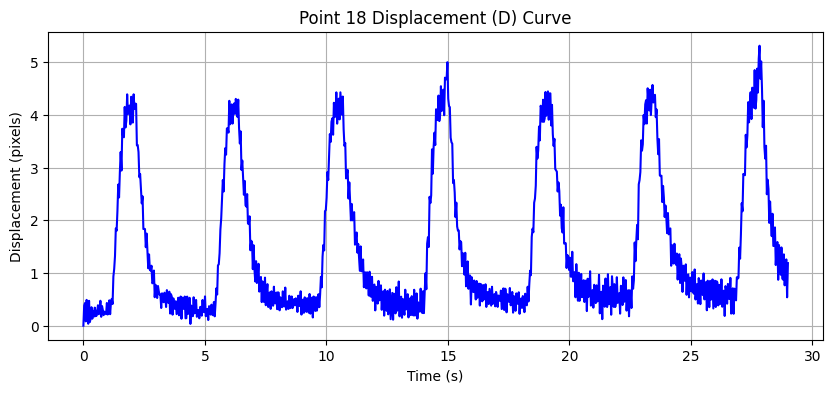

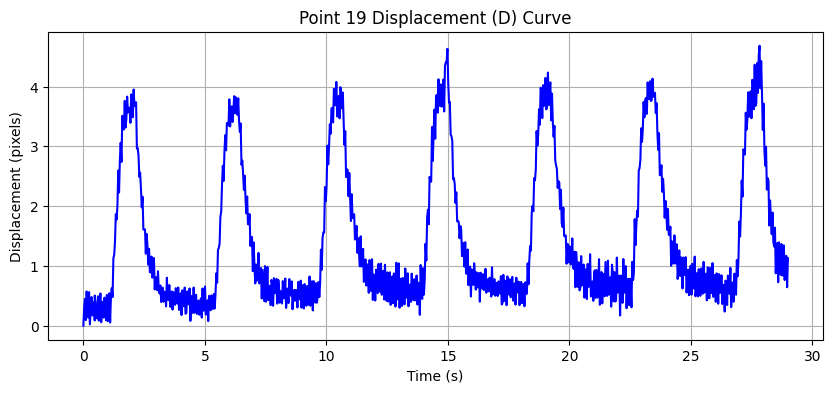

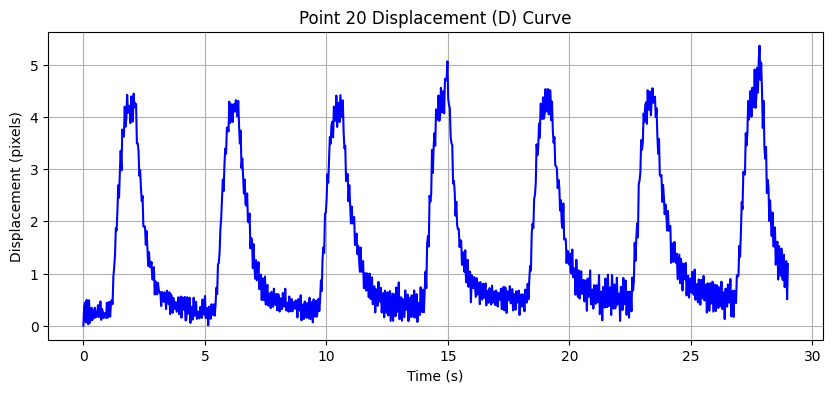

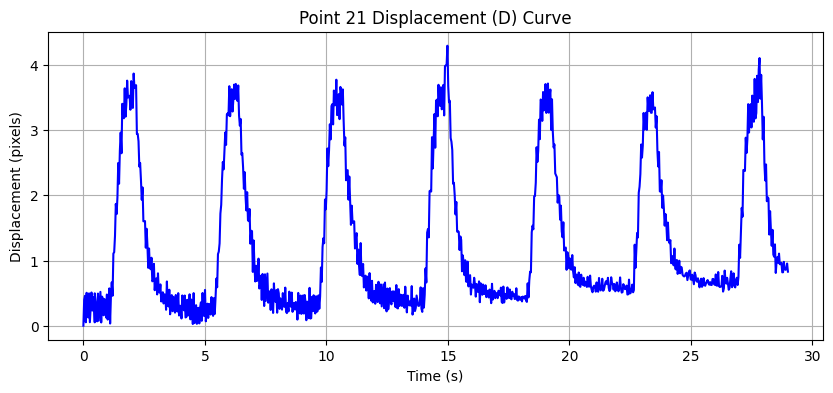

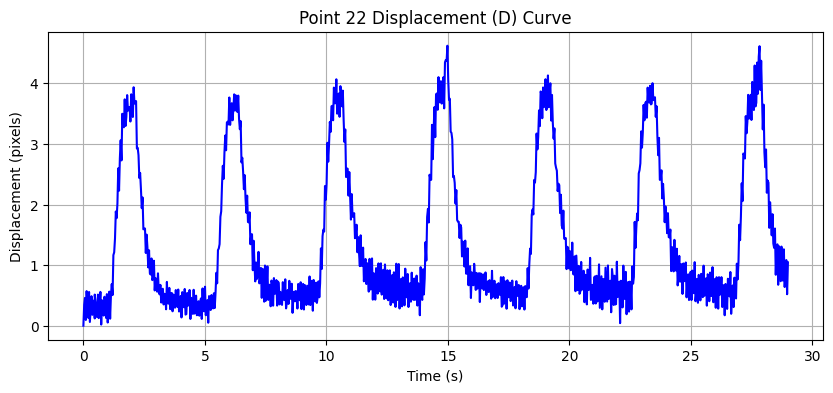

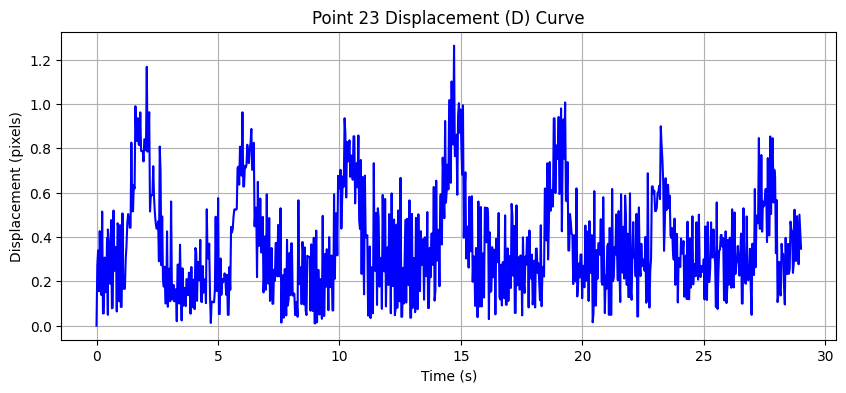

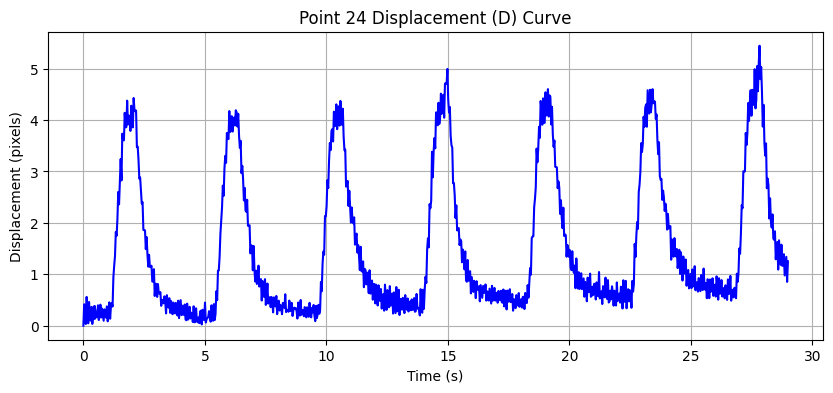

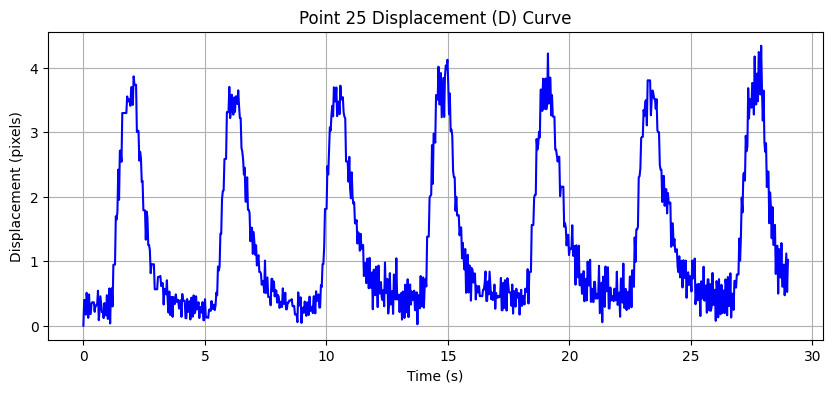

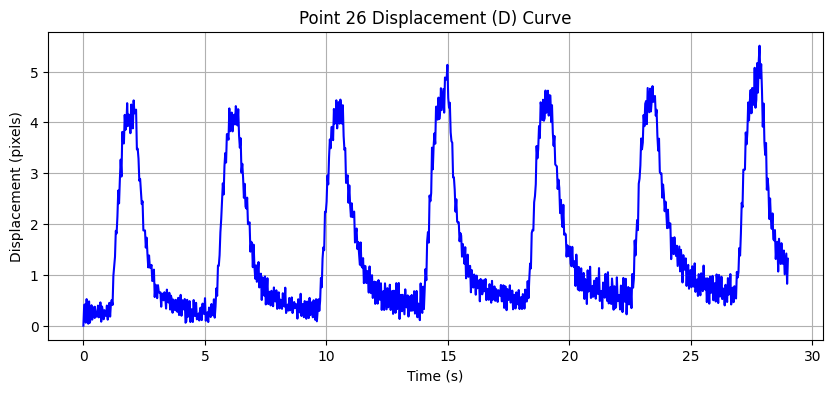

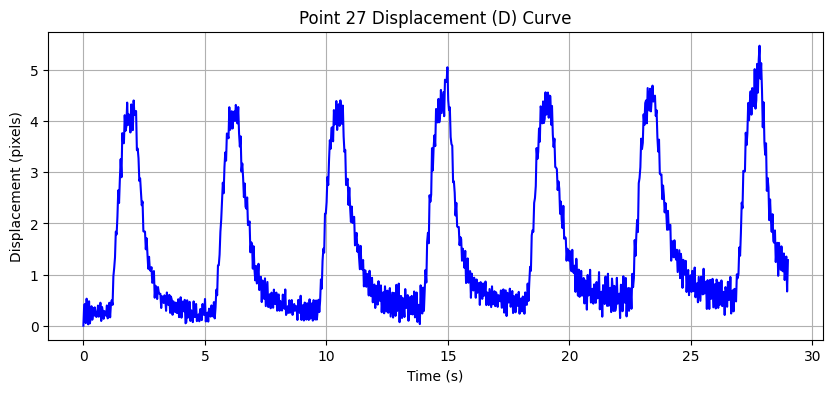

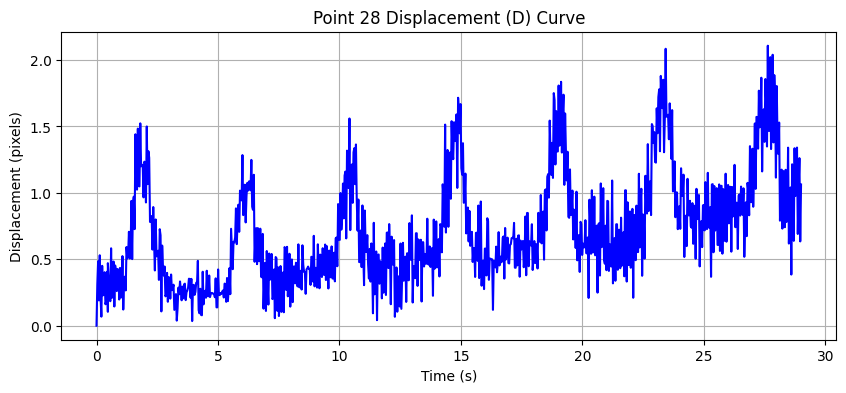

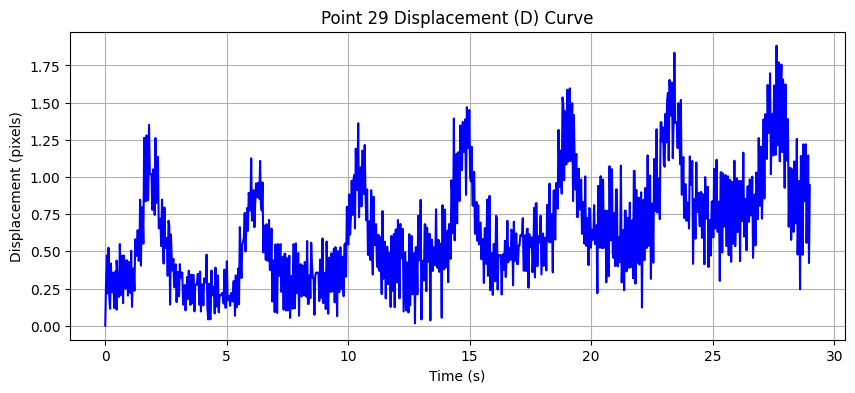

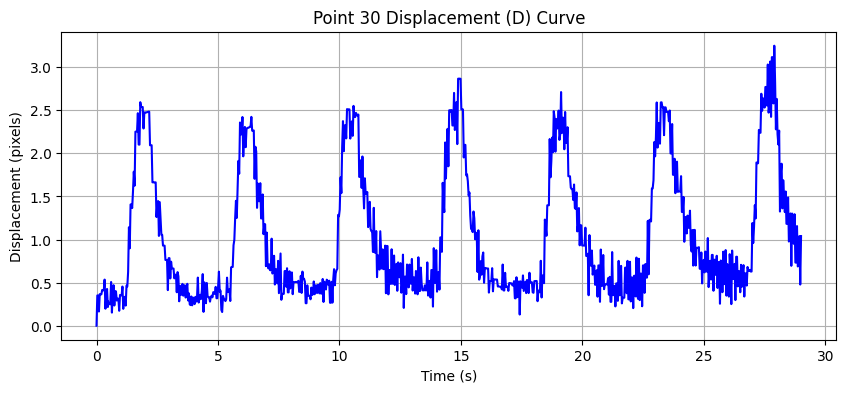

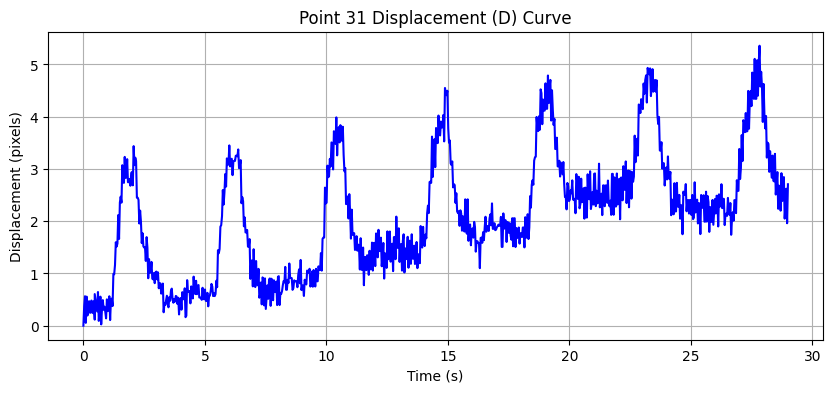

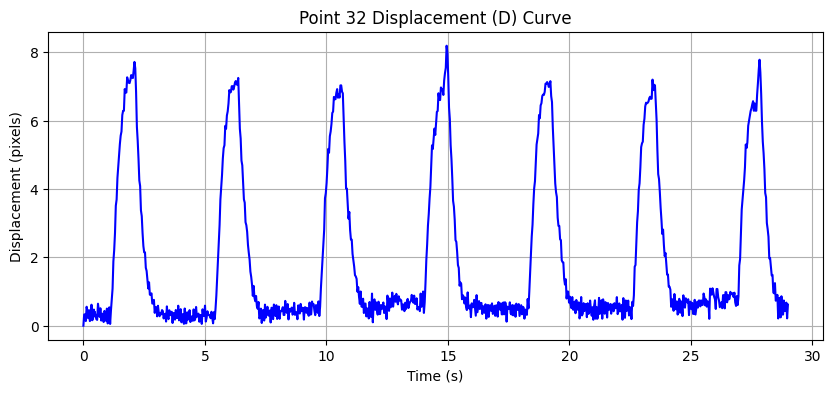

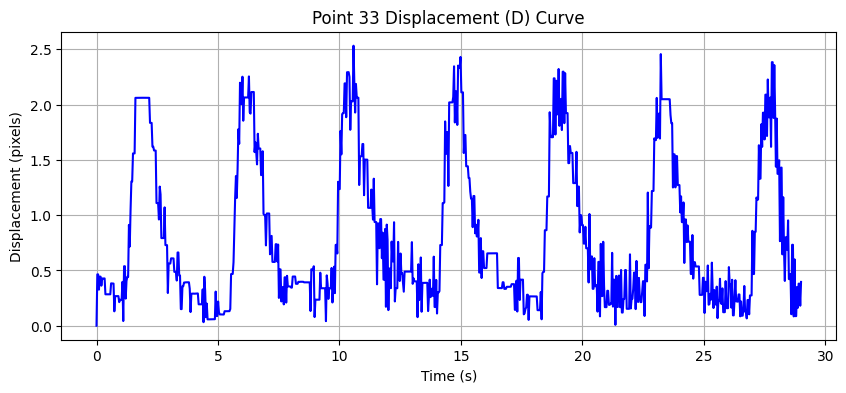

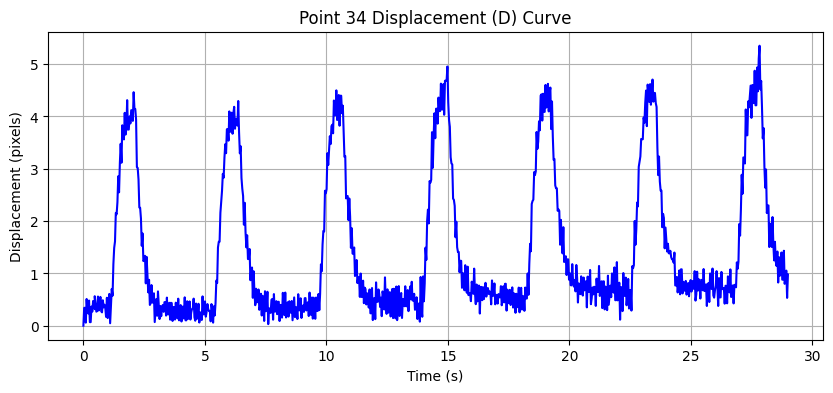

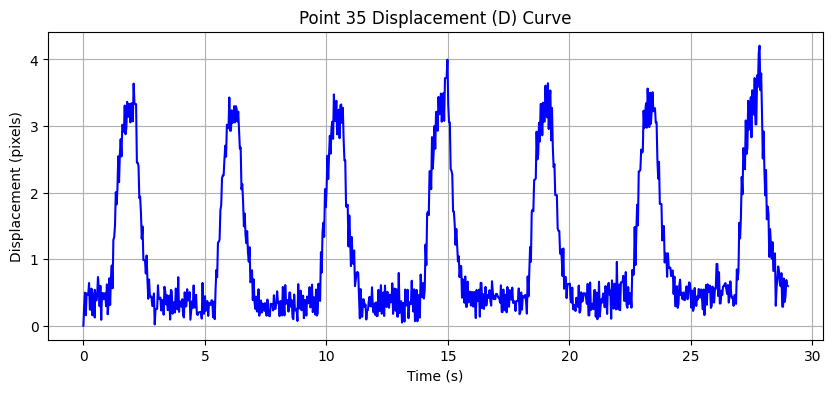

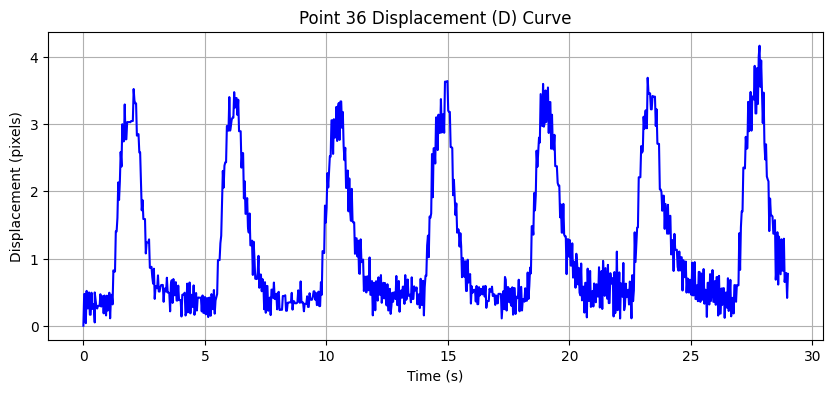

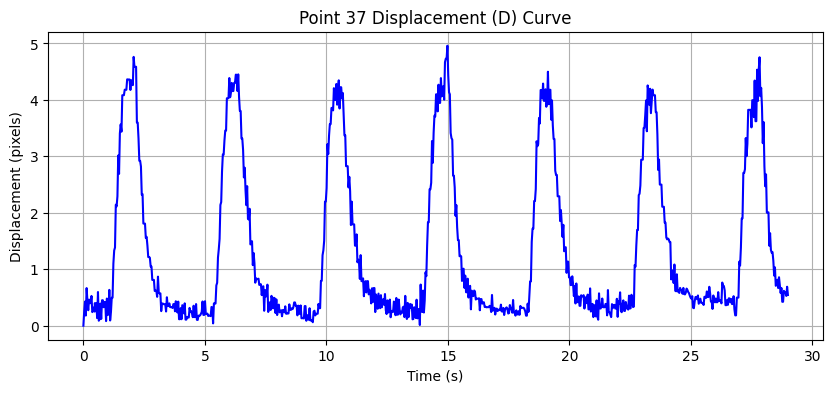

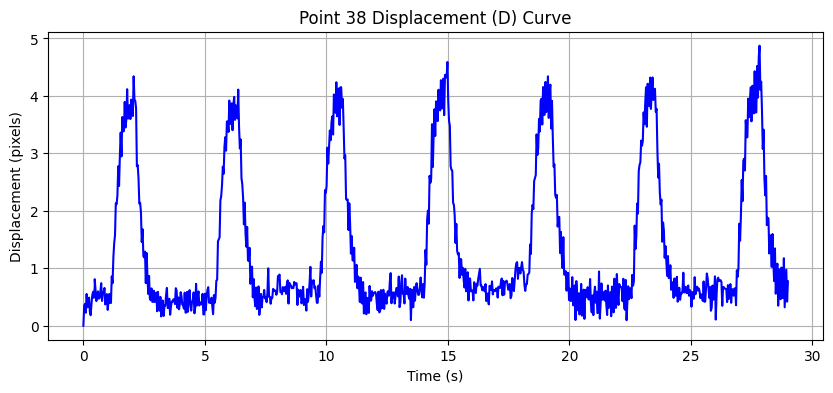

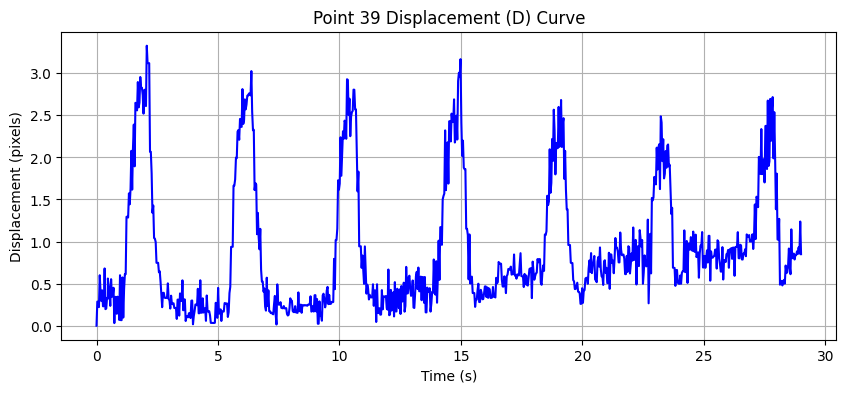

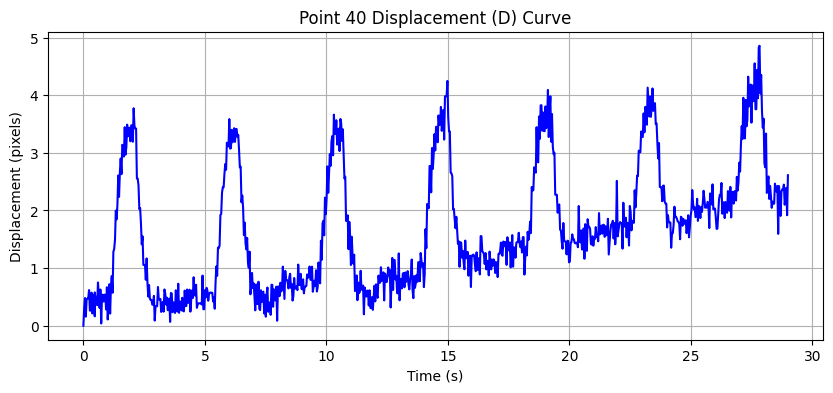

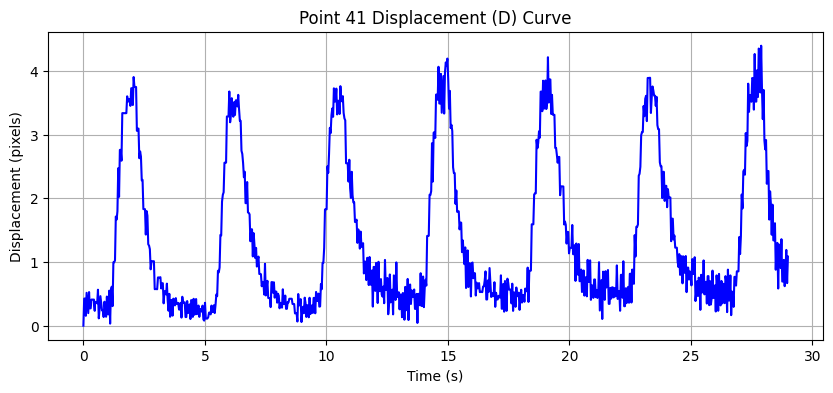

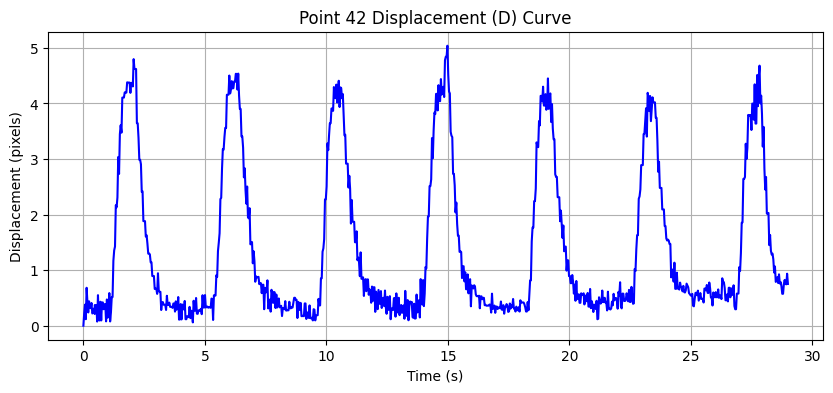

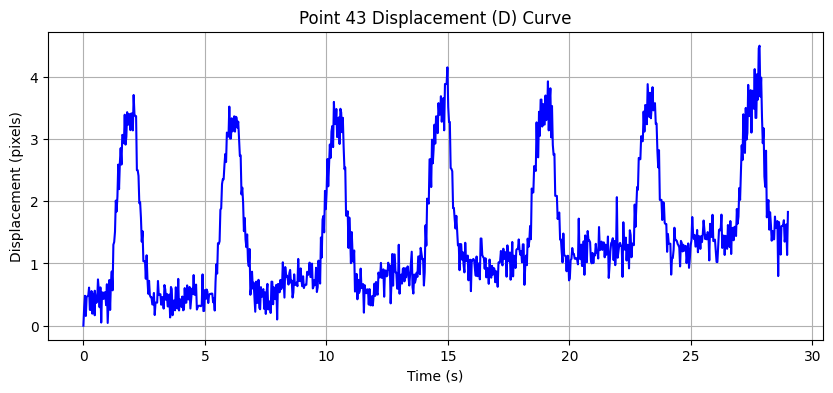

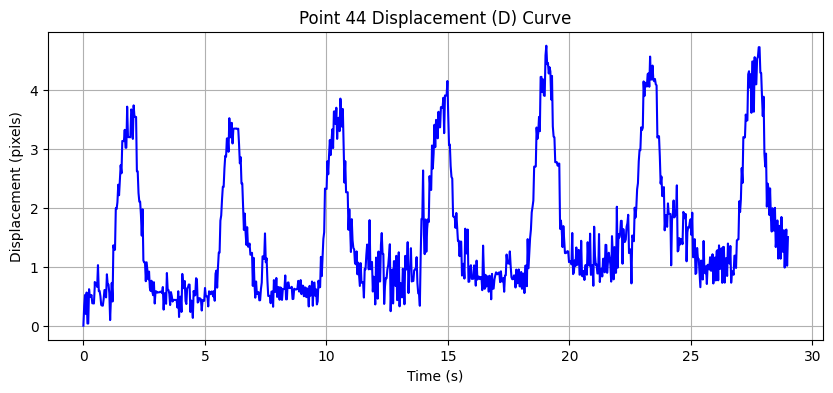

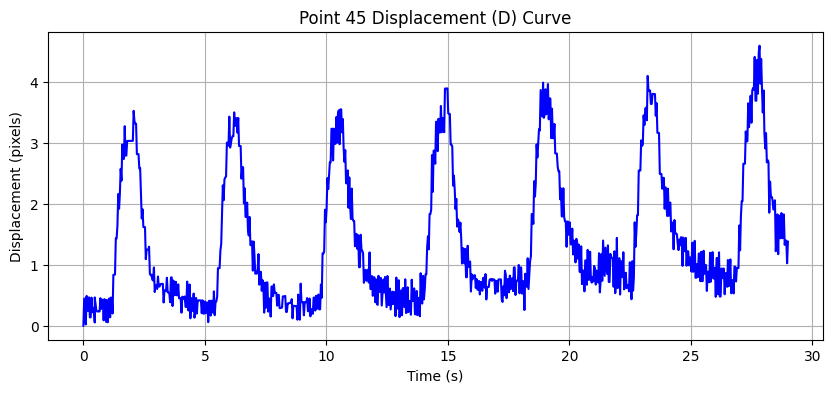

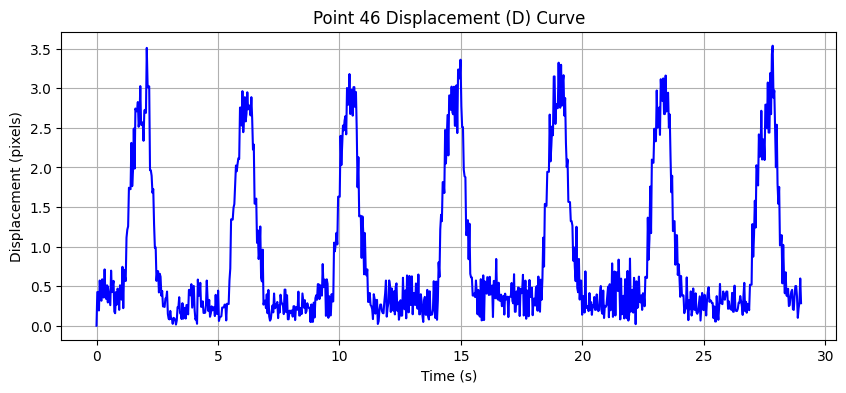

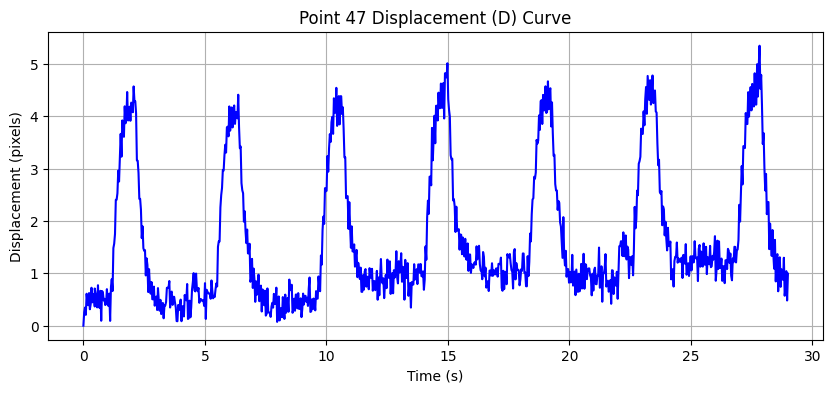

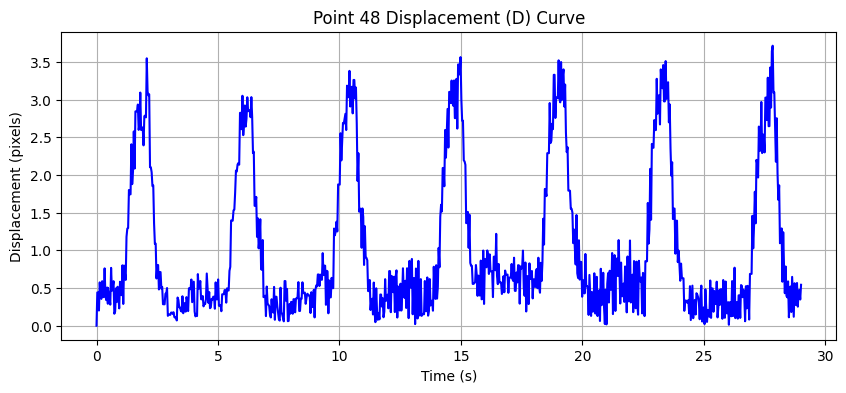

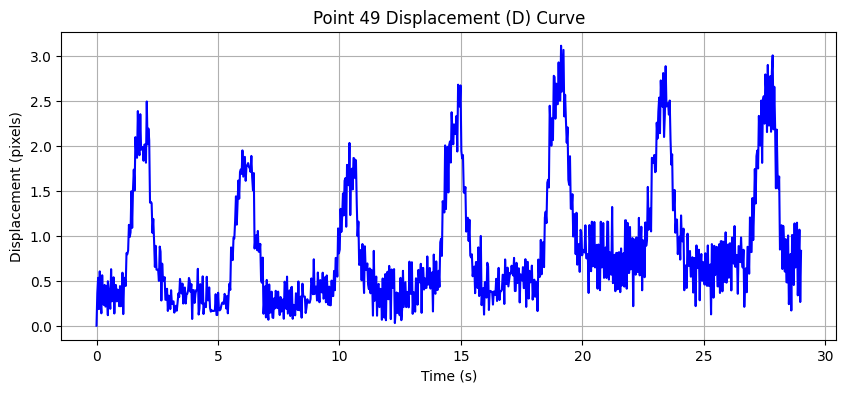

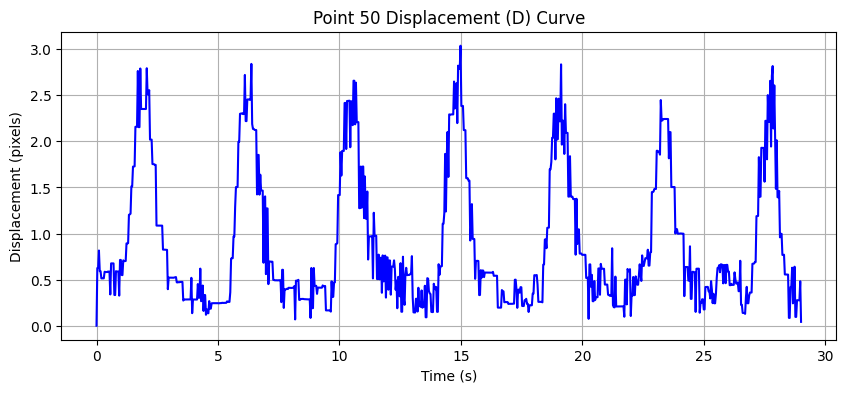

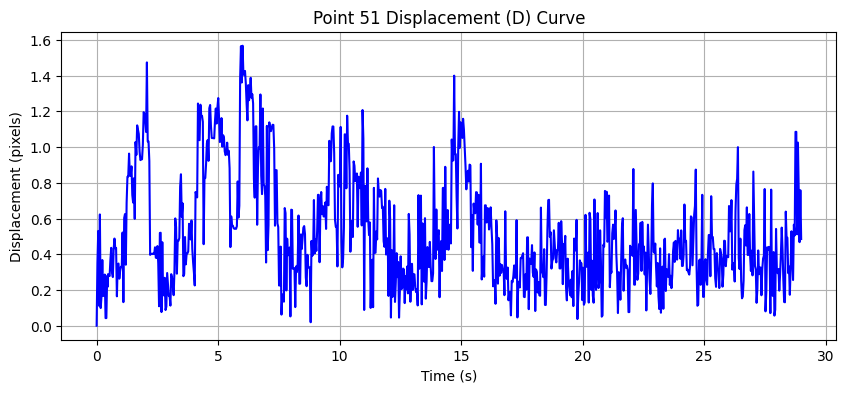

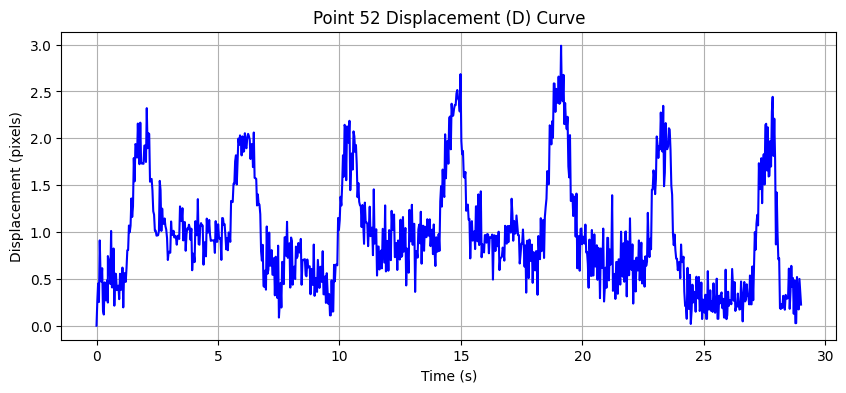

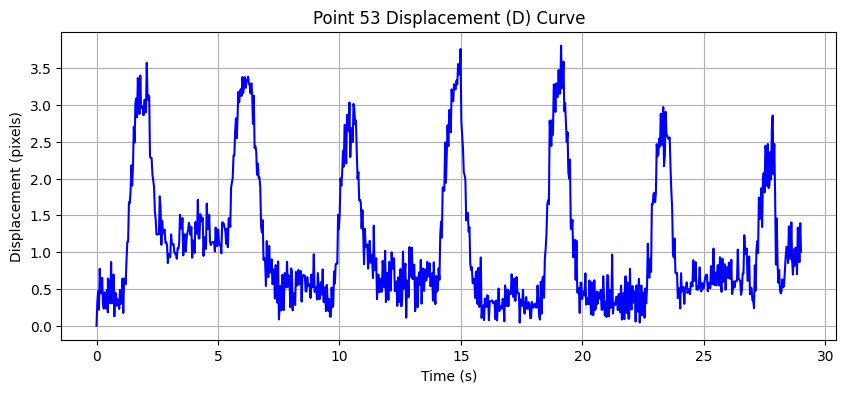

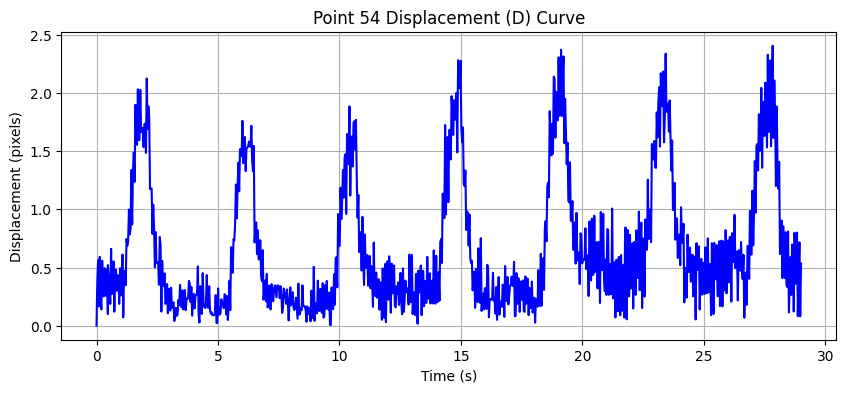

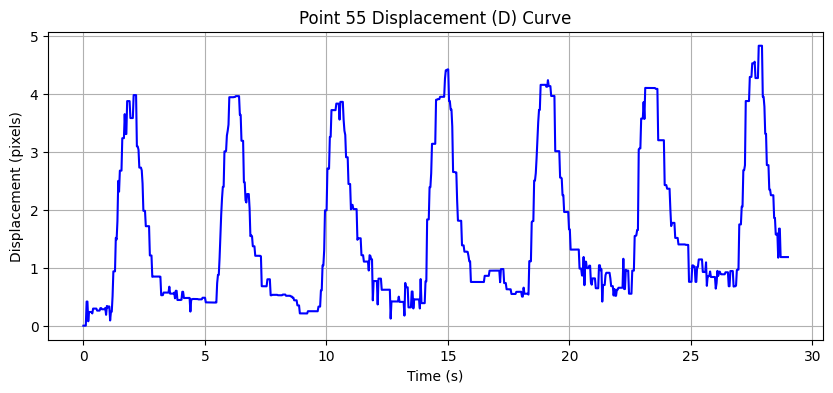

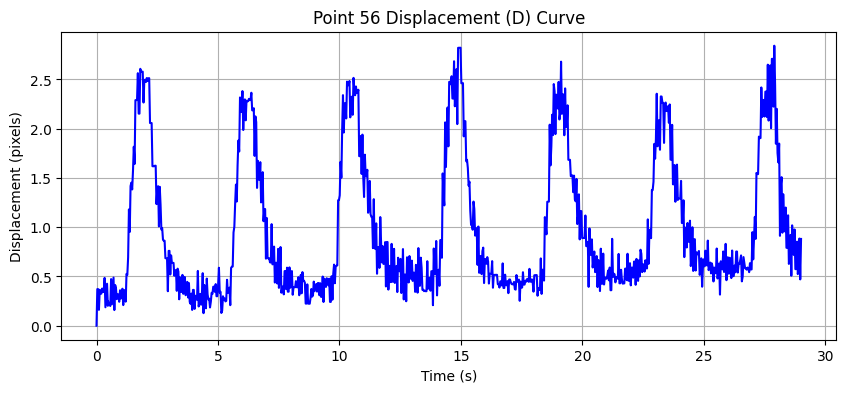

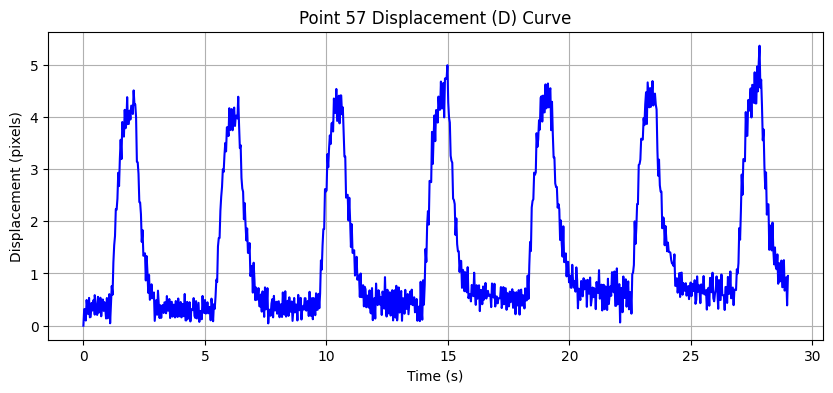

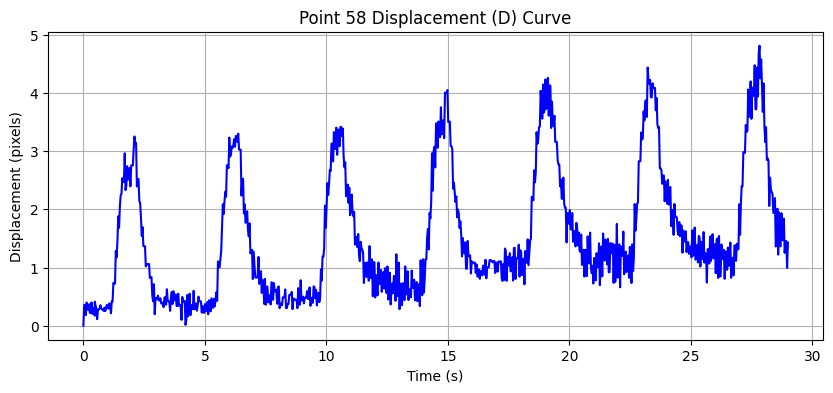

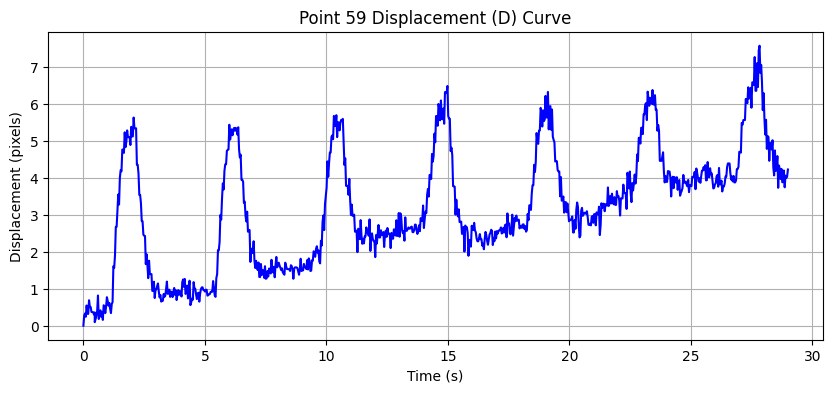

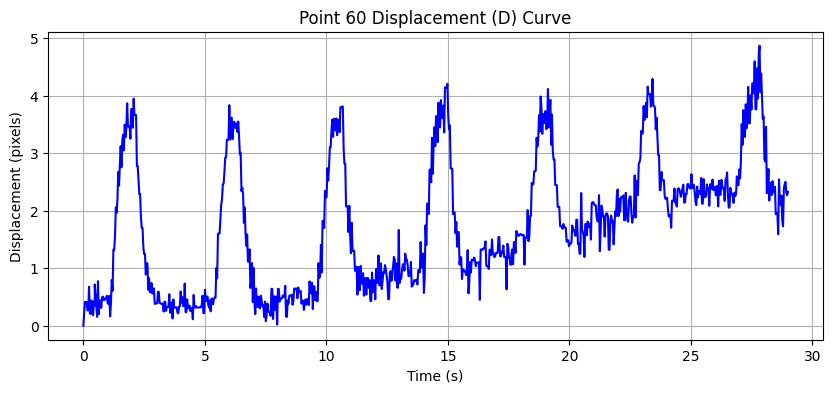

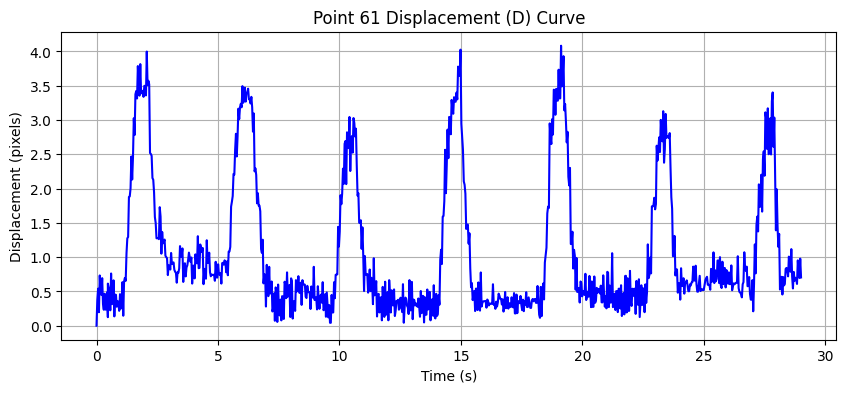

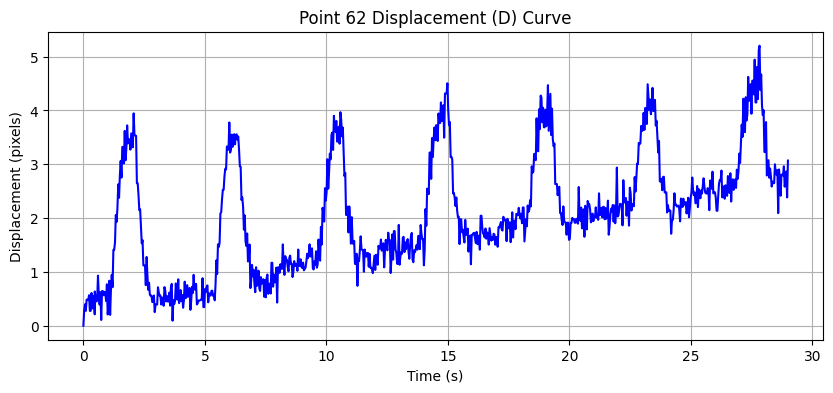

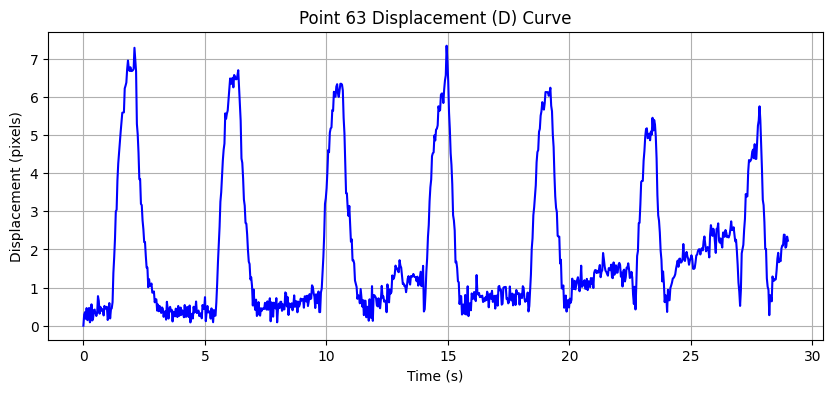

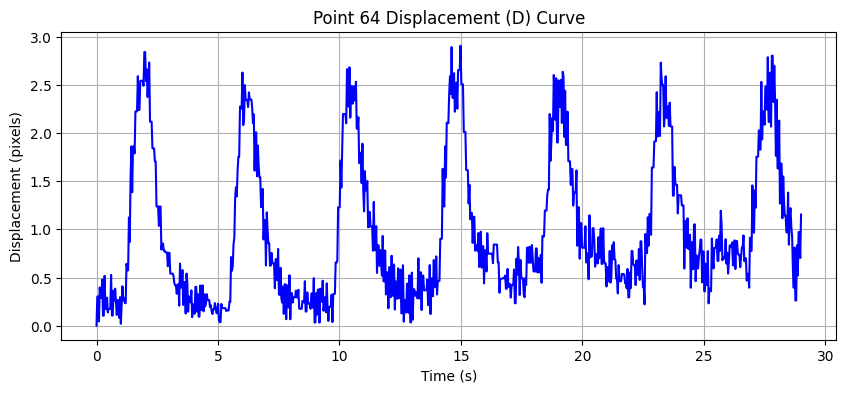

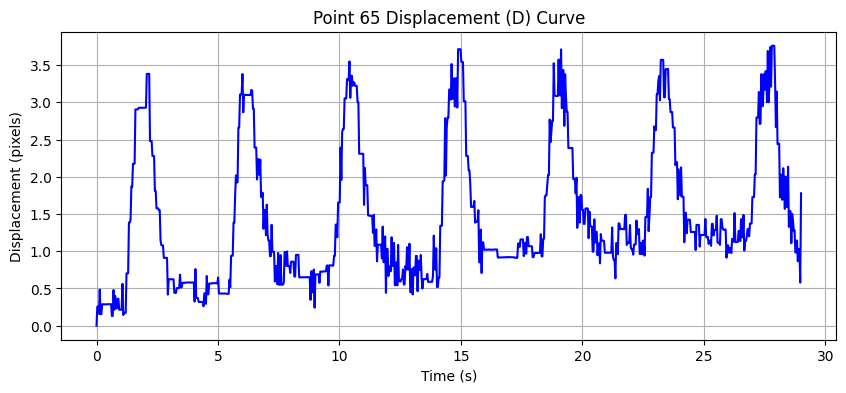

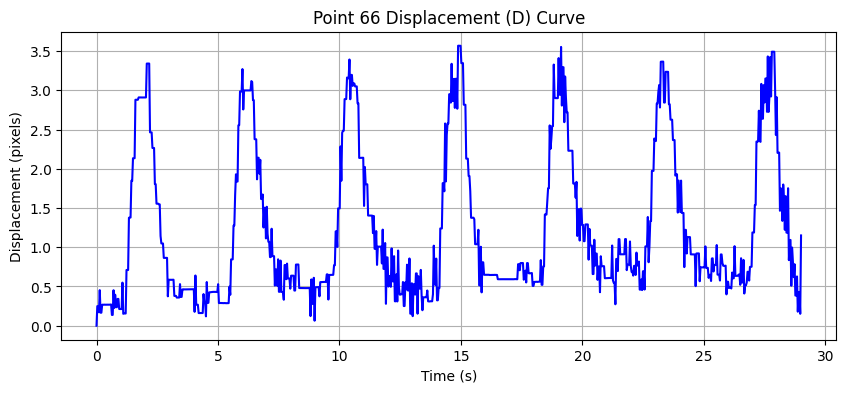

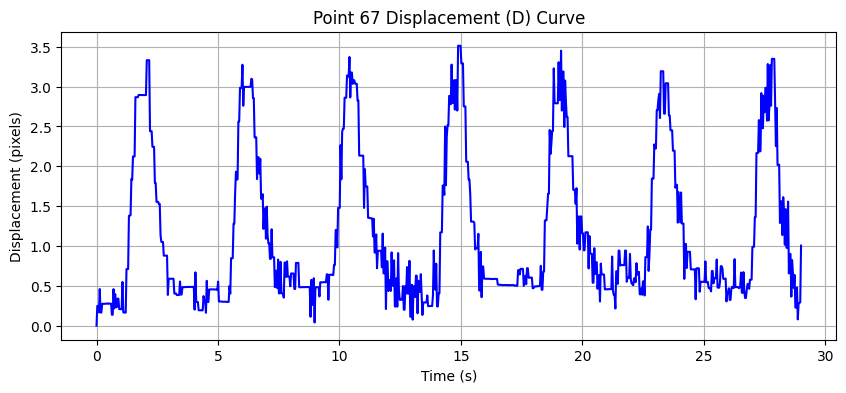

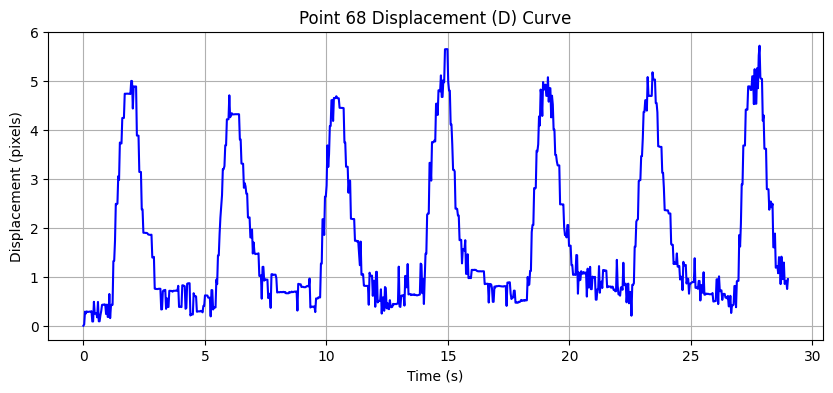

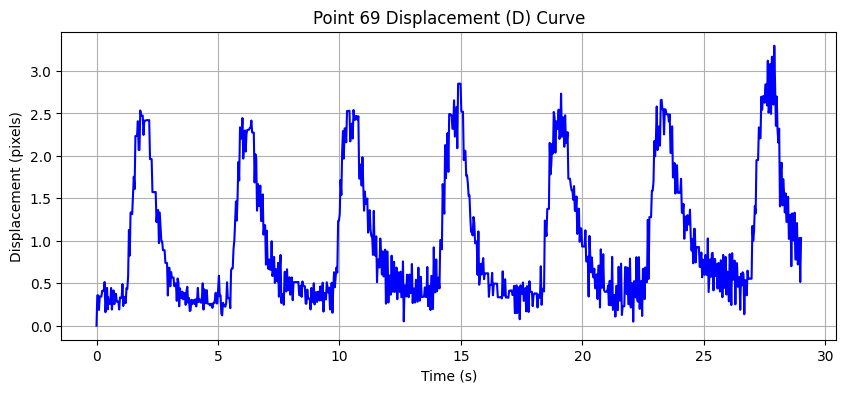

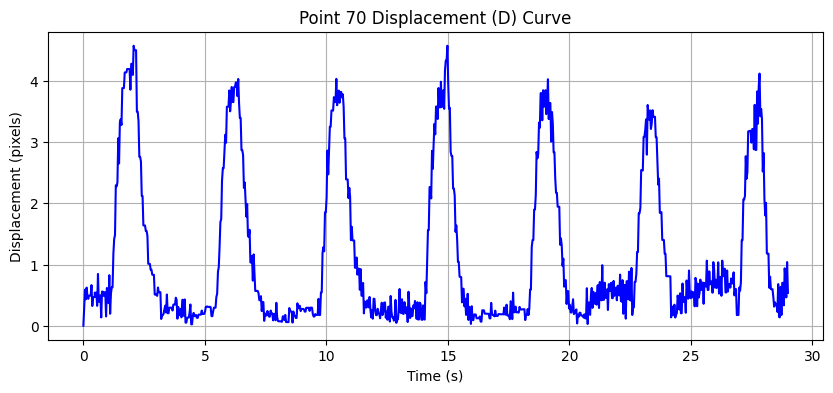

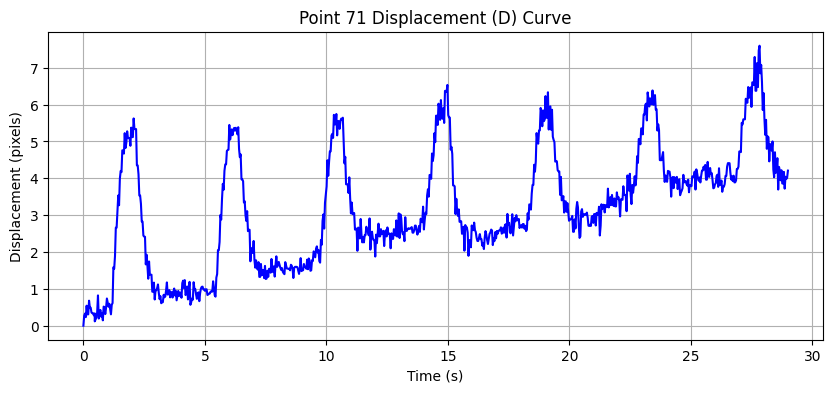

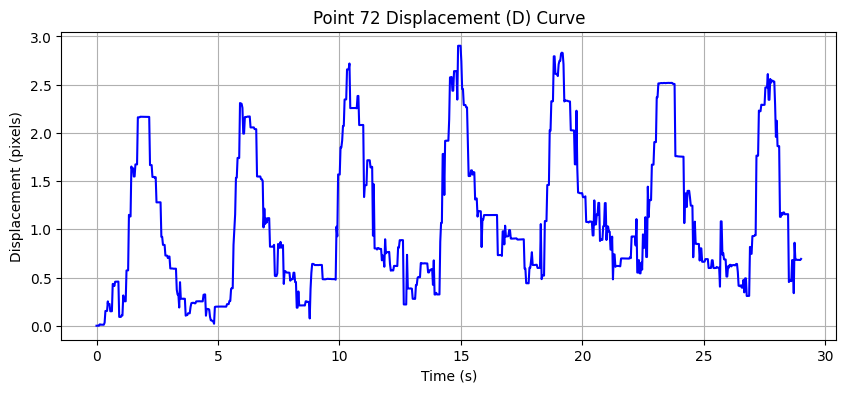

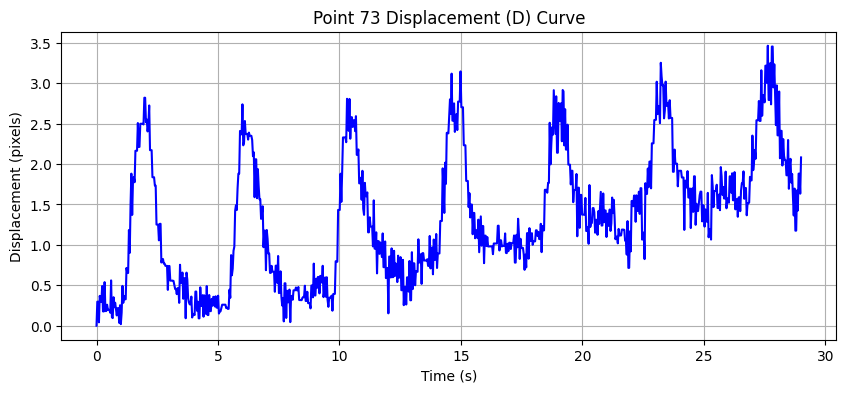

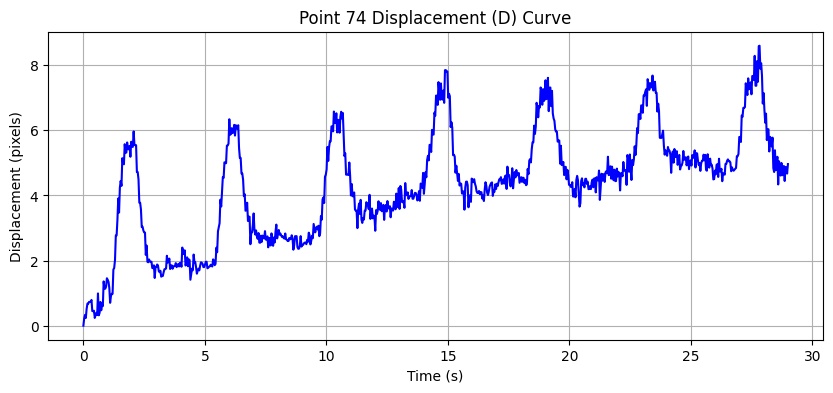

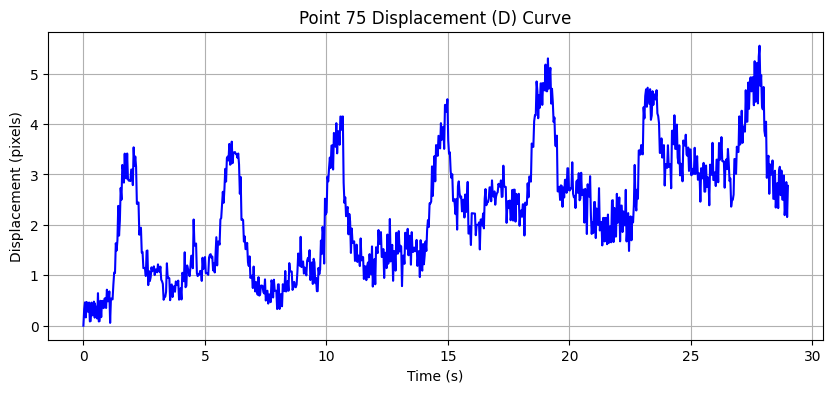

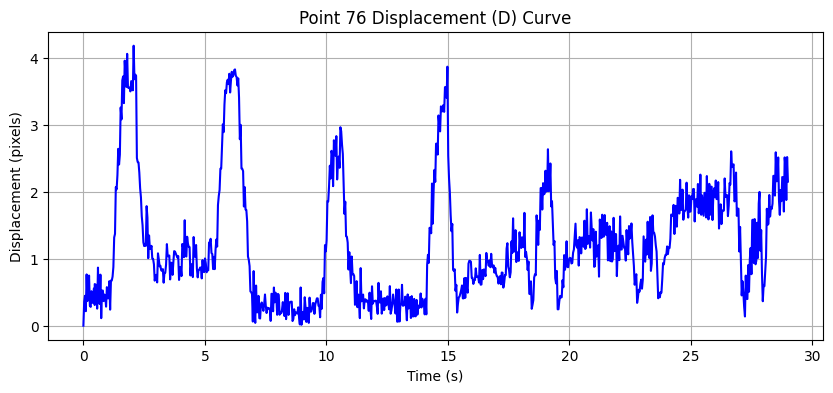


请查看上方所有点的D曲线，输入需要保留的点ID（例如：0,3,5）
请输入有效的点ID（逗号分隔）: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,34,35,36,37,38,41,42
已选择点ID: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 34, 35, 36, 37, 38, 41, 42]

归一化后的轨迹图:


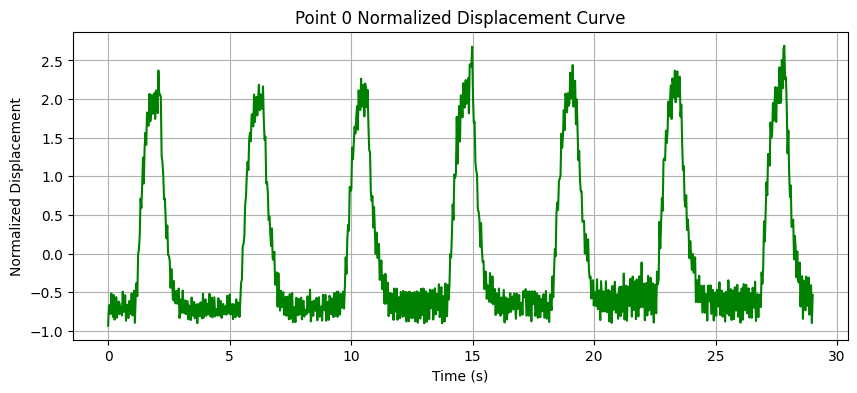

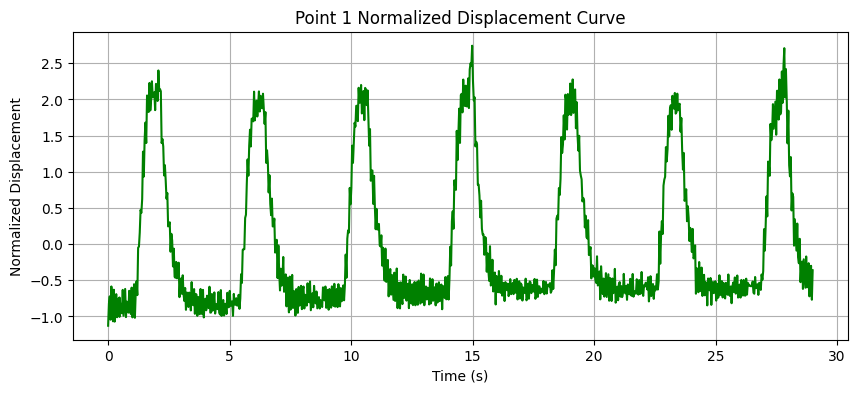

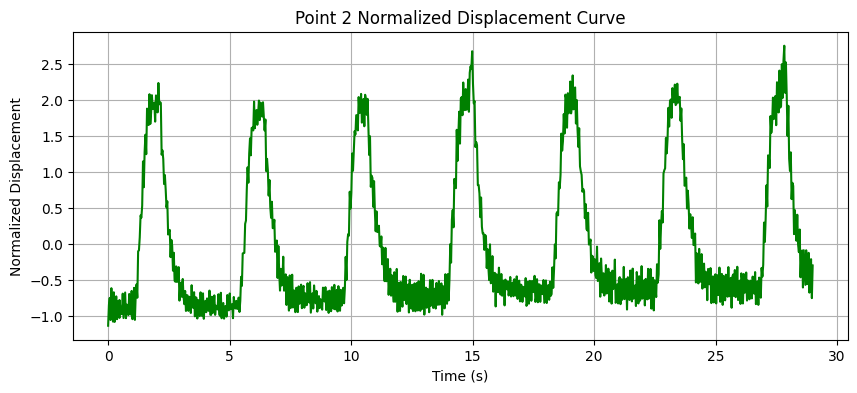

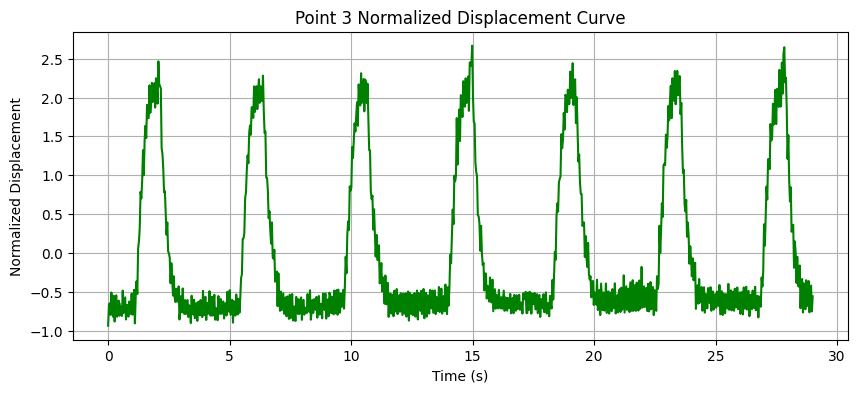

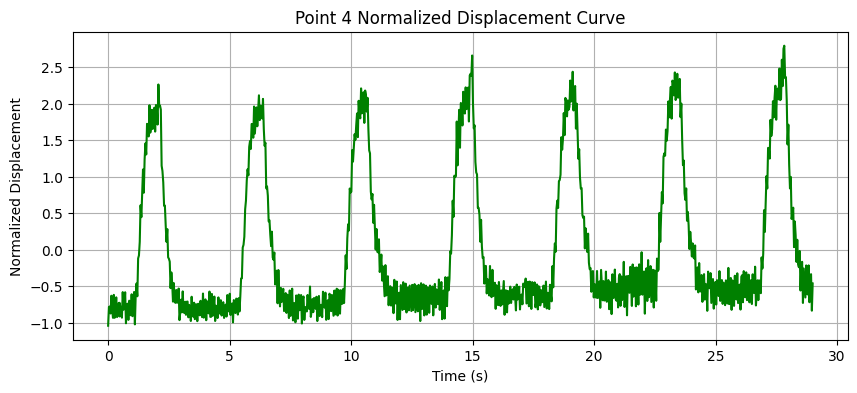

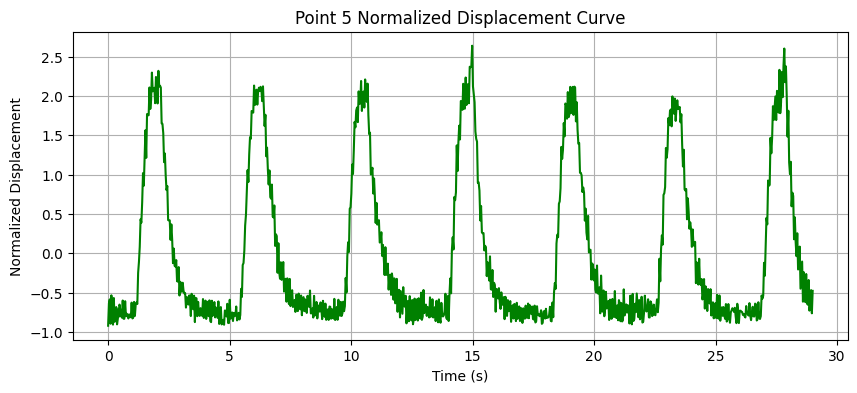

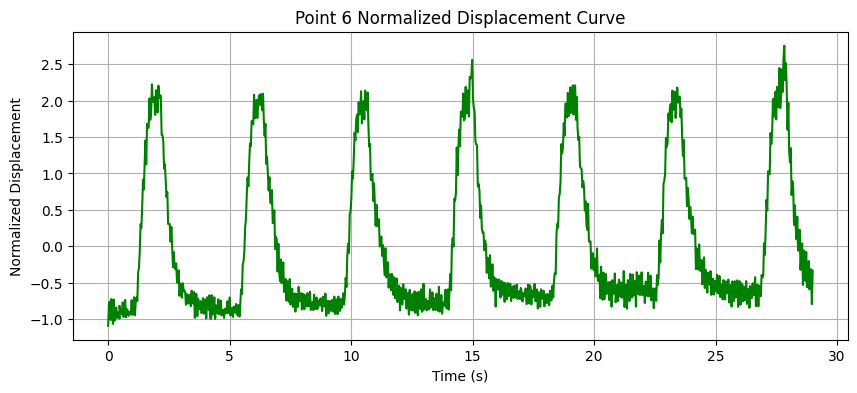

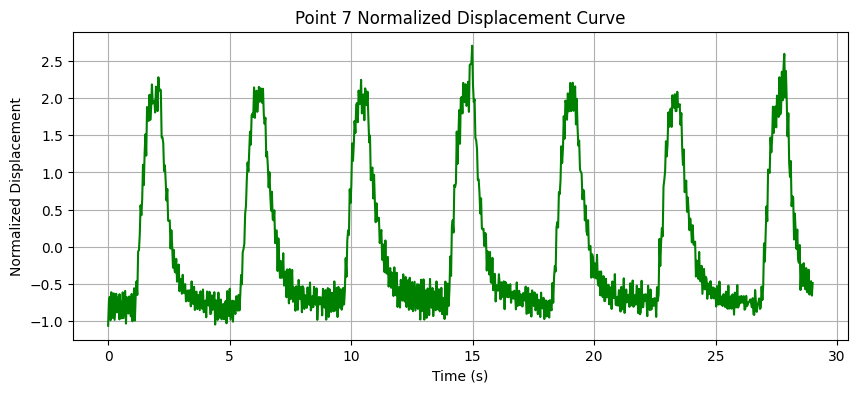

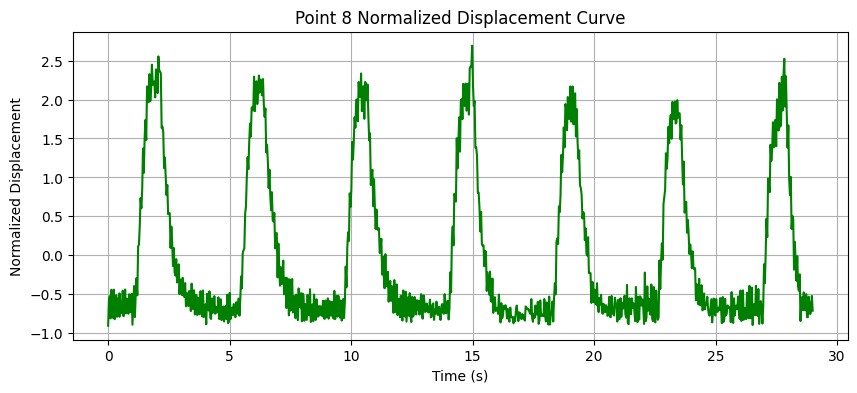

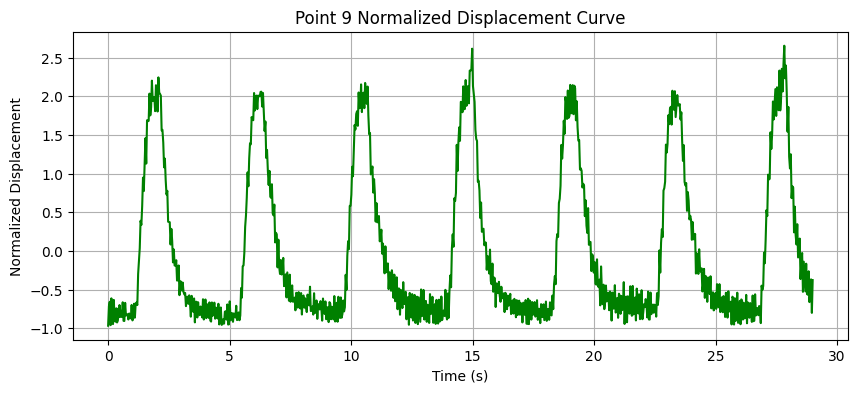

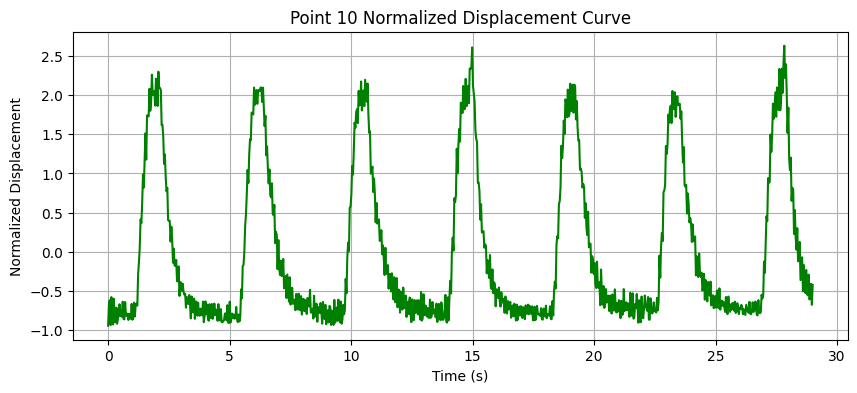

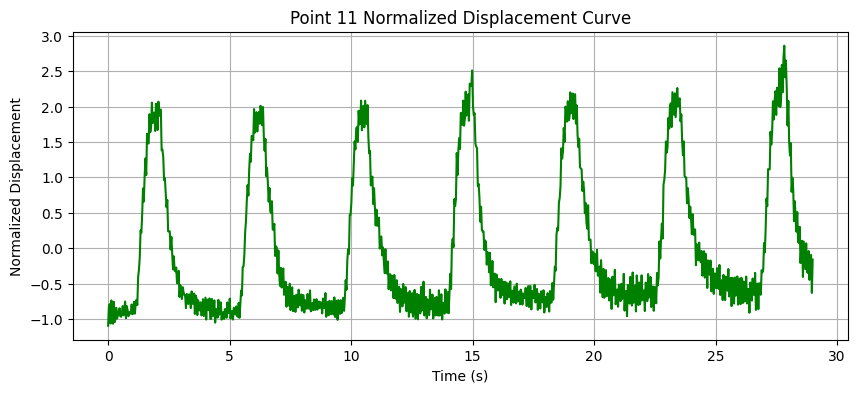

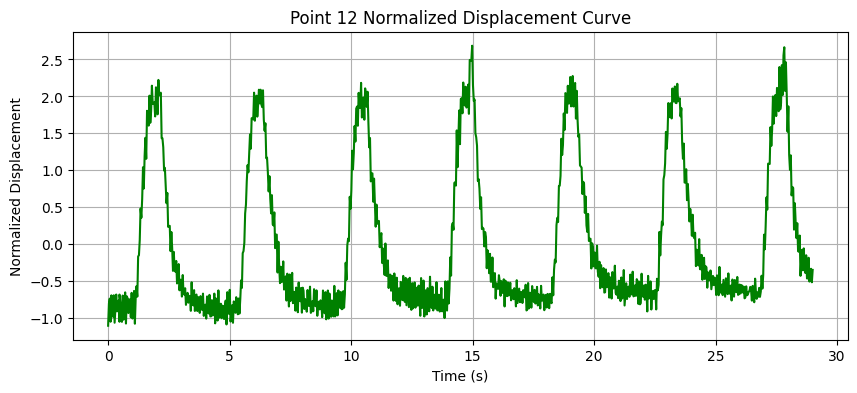

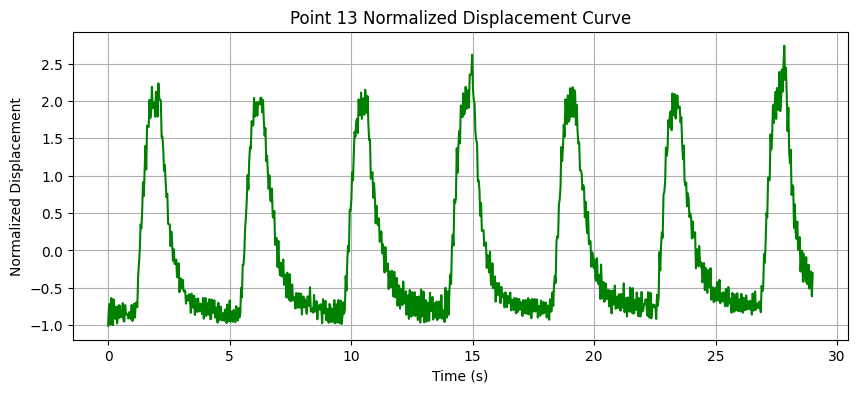

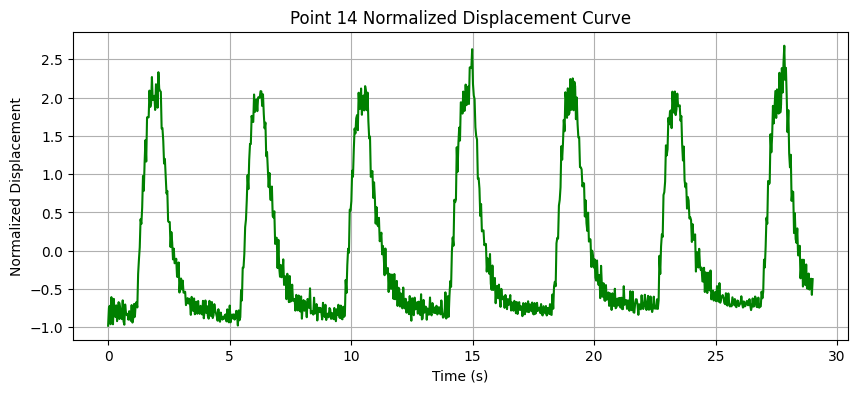

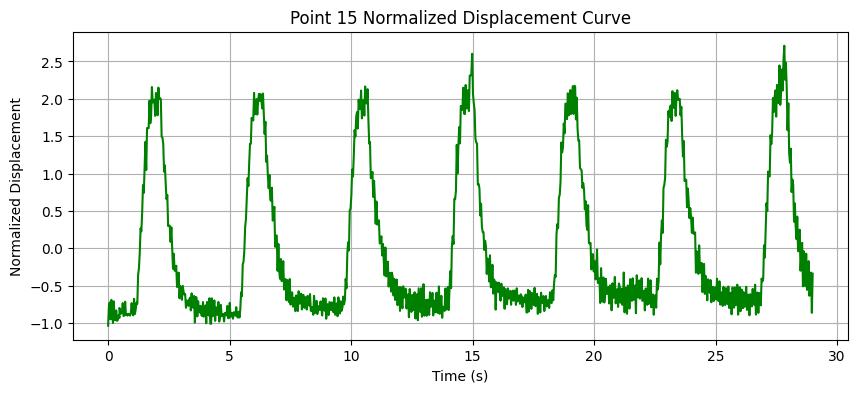

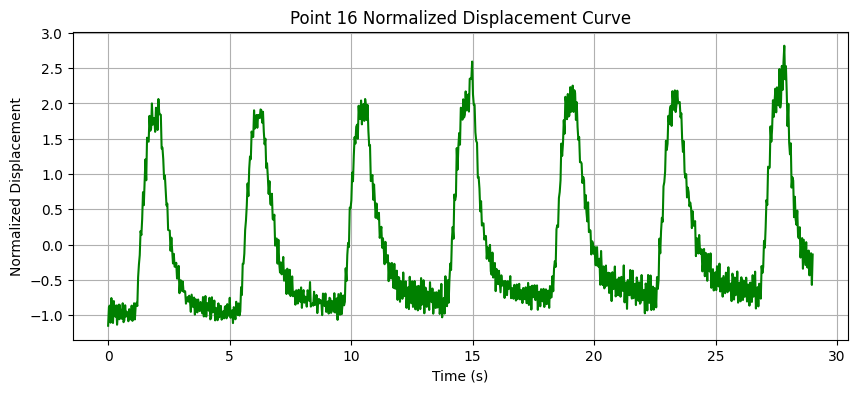

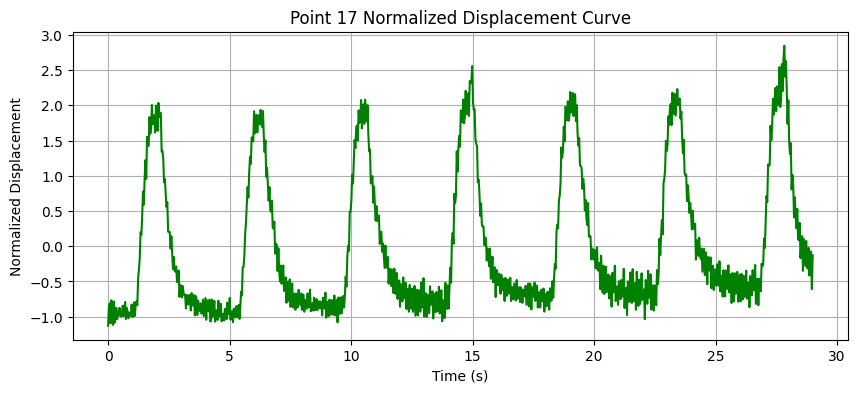

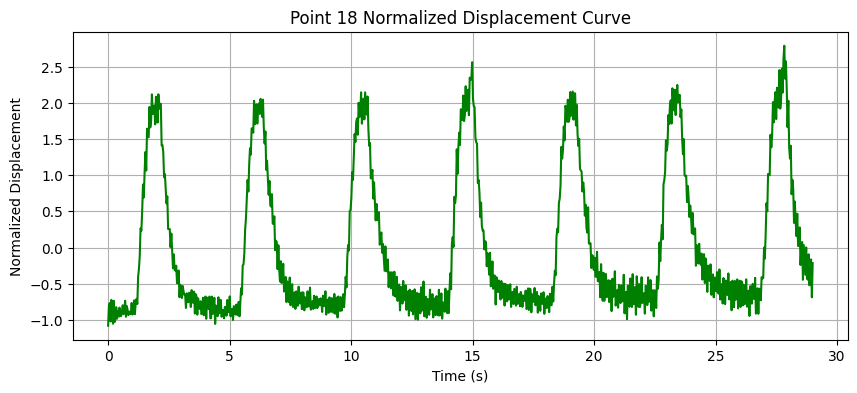

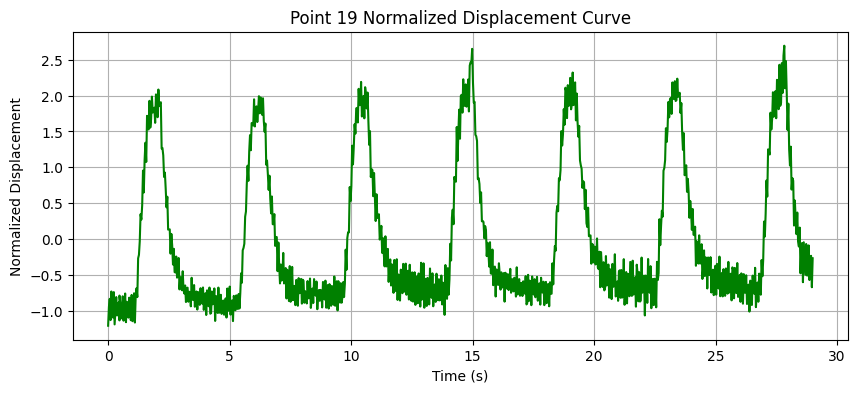

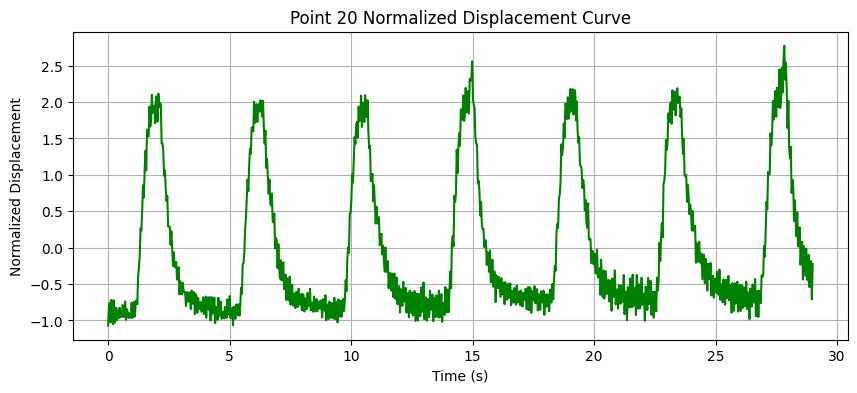

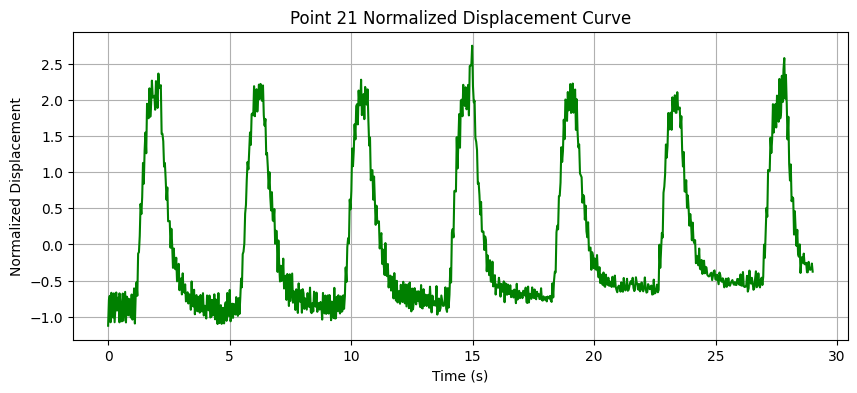

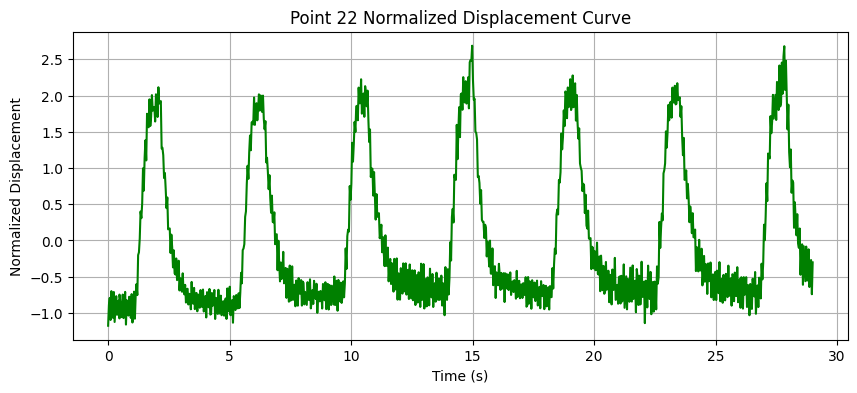

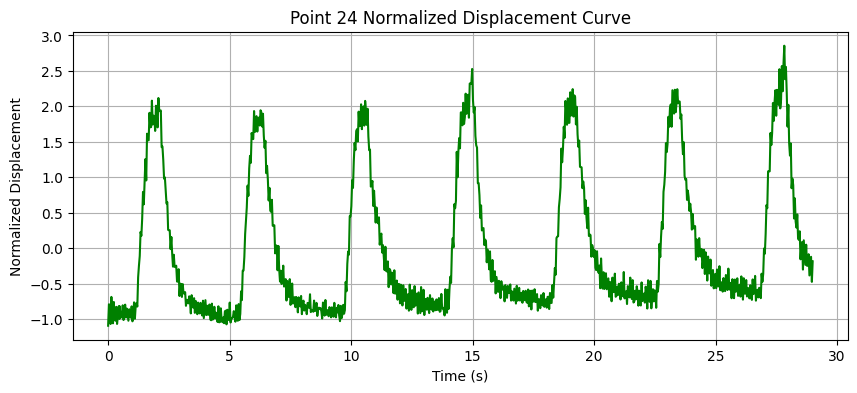

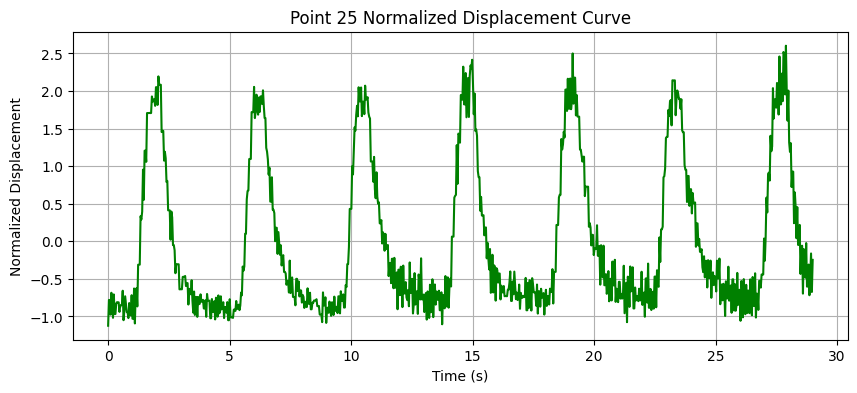

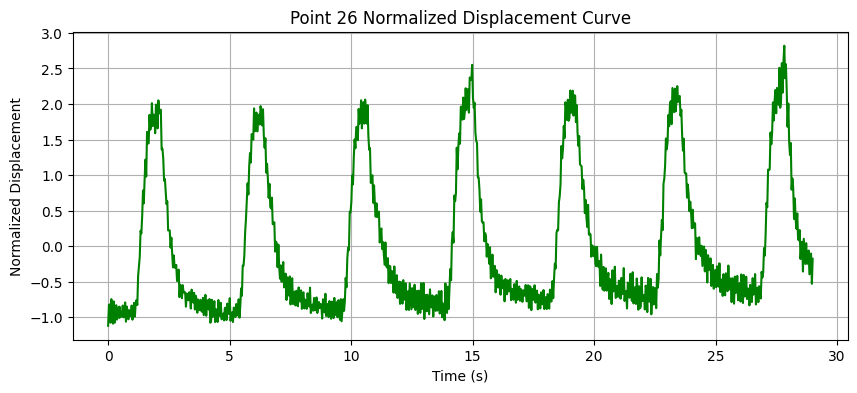

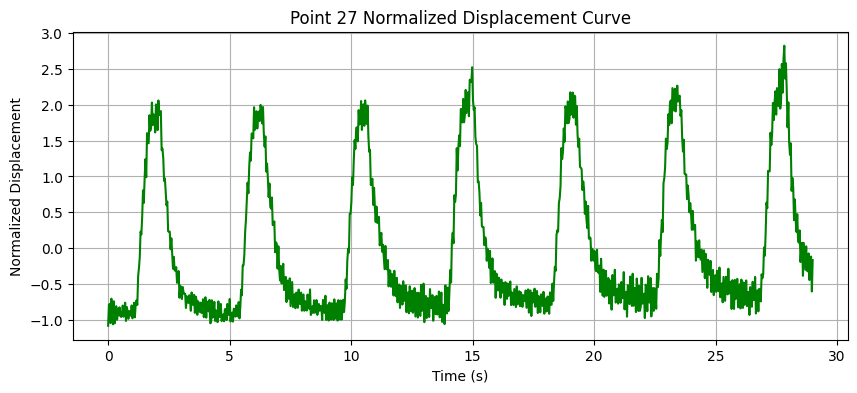

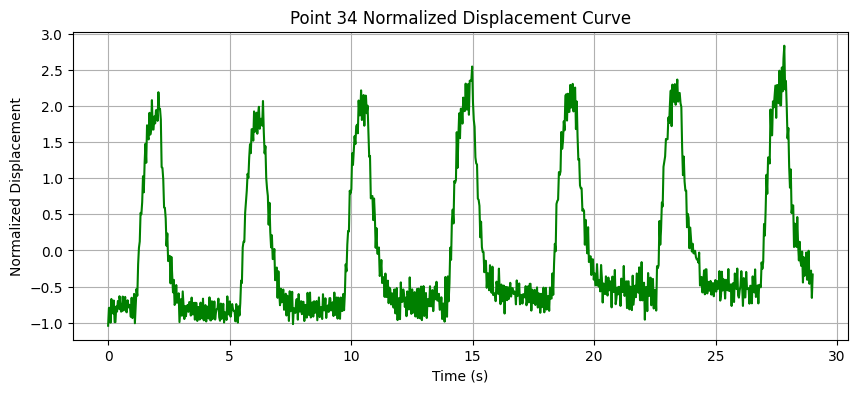

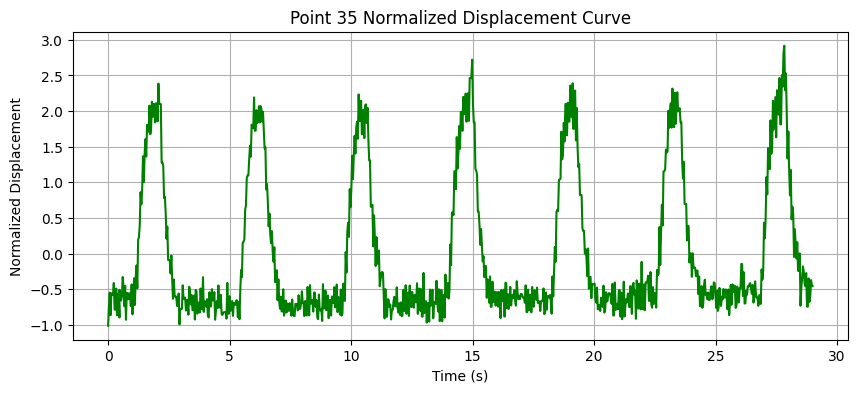

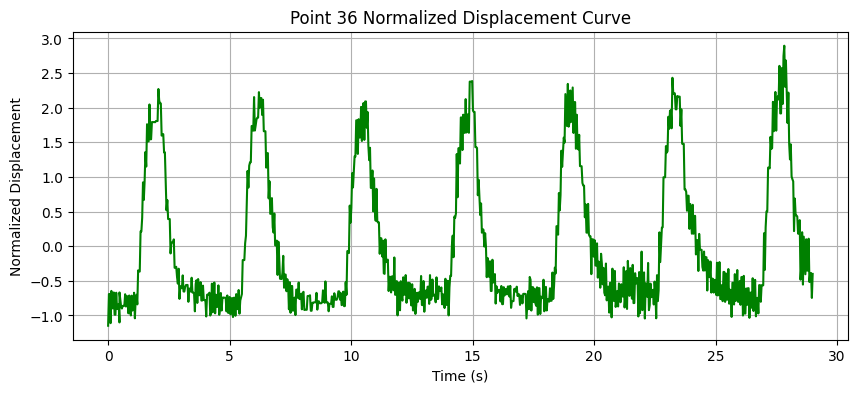

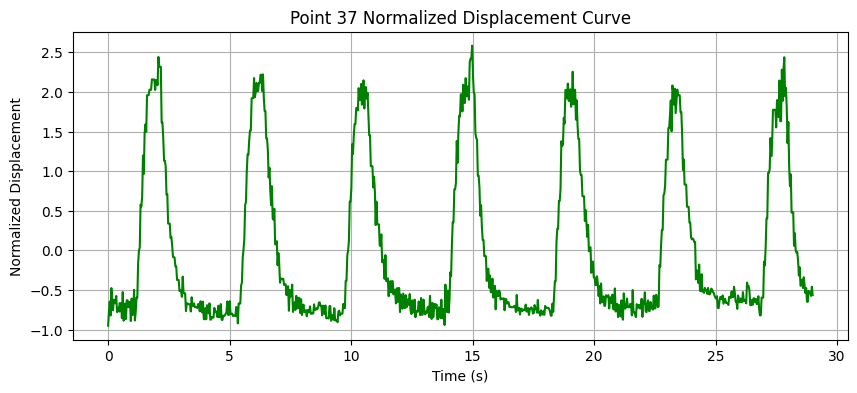

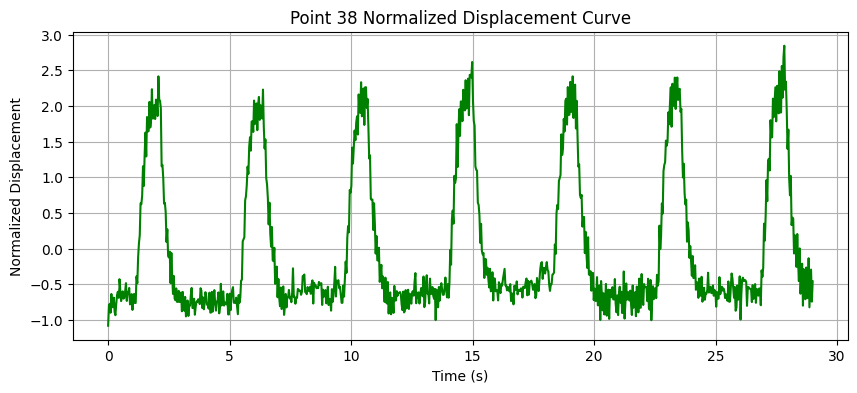

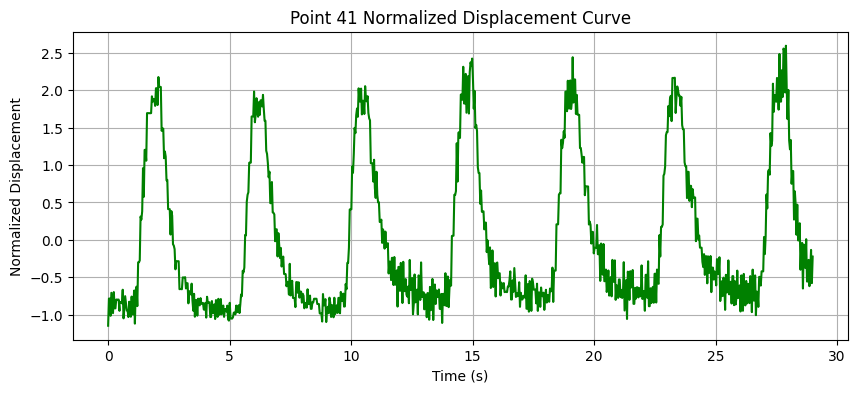

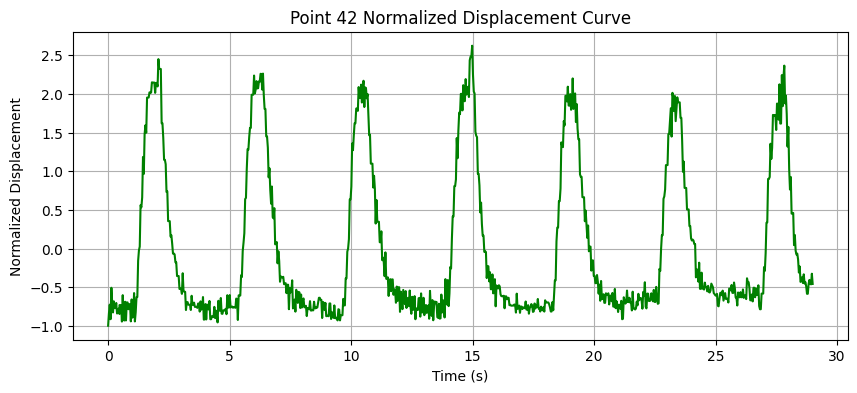

In [ ]:
##############################################################################
# 显示所有点的D曲线并让用户选择保留的点
##############################################################################

print(f"共检测到 {len(trajectories)} 个轨迹点")
for pid in trajectories:
    plt.figure(figsize=(10, 4))

    # 原始位移曲线
    plt.plot(trajectories[pid]['times'], trajectories[pid]['dd'], 'b-')
    plt.title(f'Point {pid} Displacement (D) Curve')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (pixels)')
    plt.grid(True)
    plt.show()

print("\n请查看上方所有点的D曲线，输入需要保留的点ID（例如：0,3,5）")
selected_ids = list(map(int, input("请输入有效的点ID（逗号分隔）: ").split(',')))
print(f"已选择点ID: {selected_ids}")

# 归一化并显示归一化后的轨迹图
print("\n归一化后的轨迹图:")
for pid in trajectories:
    if pid in selected_ids:
        # 对每个选定点的位移进行归一化
        dd_values = np.array(trajectories[pid]['dd'])
        mu = np.mean(dd_values)
        sig = np.std(dd_values) + 1e-8  # 添加小常数避免除零错误
        normalized_dd = (dd_values - mu) / sig

        plt.figure(figsize=(10, 4))
        plt.plot(trajectories[pid]['times'], normalized_dd, 'g-')
        plt.title(f'Point {pid} Normalized Displacement Curve')
        plt.xlabel('Time (s)')
        plt.ylabel('Normalized Displacement')
        plt.grid(True)
        plt.show()


请输入第二部分开始时间 (HH:MM:SS, 直接回车表示从视频开始): 
请输入第二部分结束时间 (HH:MM:SS, 直接回车表示到视频结束): 
第二部分处理范围: 帧 0 到 413729 (FPS: 29.97)
处理进度: 绝对帧 10 (第二部分: 11/413730, 0.0%)
处理进度: 绝对帧 5010 (第二部分: 5011/413730, 1.2%)
处理进度: 绝对帧 10010 (第二部分: 10011/413730, 2.4%)
处理进度: 绝对帧 15010 (第二部分: 15011/413730, 3.6%)
处理进度: 绝对帧 20010 (第二部分: 20011/413730, 4.8%)
处理进度: 绝对帧 25010 (第二部分: 25011/413730, 6.0%)
处理进度: 绝对帧 30010 (第二部分: 30011/413730, 7.3%)
处理进度: 绝对帧 35010 (第二部分: 35011/413730, 8.5%)
处理进度: 绝对帧 40010 (第二部分: 40011/413730, 9.7%)
处理进度: 绝对帧 45010 (第二部分: 45011/413730, 10.9%)
处理进度: 绝对帧 50010 (第二部分: 50011/413730, 12.1%)
处理进度: 绝对帧 55010 (第二部分: 55011/413730, 13.3%)
处理进度: 绝对帧 60010 (第二部分: 60011/413730, 14.5%)
处理进度: 绝对帧 65010 (第二部分: 65011/413730, 15.7%)
处理进度: 绝对帧 70010 (第二部分: 70011/413730, 16.9%)
处理进度: 绝对帧 75010 (第二部分: 75011/413730, 18.1%)
处理进度: 绝对帧 80010 (第二部分: 80011/413730, 19.3%)
处理进度: 绝对帧 85010 (第二部分: 85011/413730, 20.5%)
处理进度: 绝对帧 90010 (第二部分: 90011/413730, 21.8%)
处理进度: 绝对帧 95010 (第二部分: 95011/413730, 23.0%)
处理进度: 绝对帧 100010 (第二部分: 

/tmp/ipython-input-1825491987.py:203: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1825491987.py:203: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1825491987.py:203: UserWarning: Glyph 31186 (\N{CJK UNIFIED IDEOGRAPH-79D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1825491987.py:203: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1825491987.py:203: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1825491987.py:203: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1825491987.py:203: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}

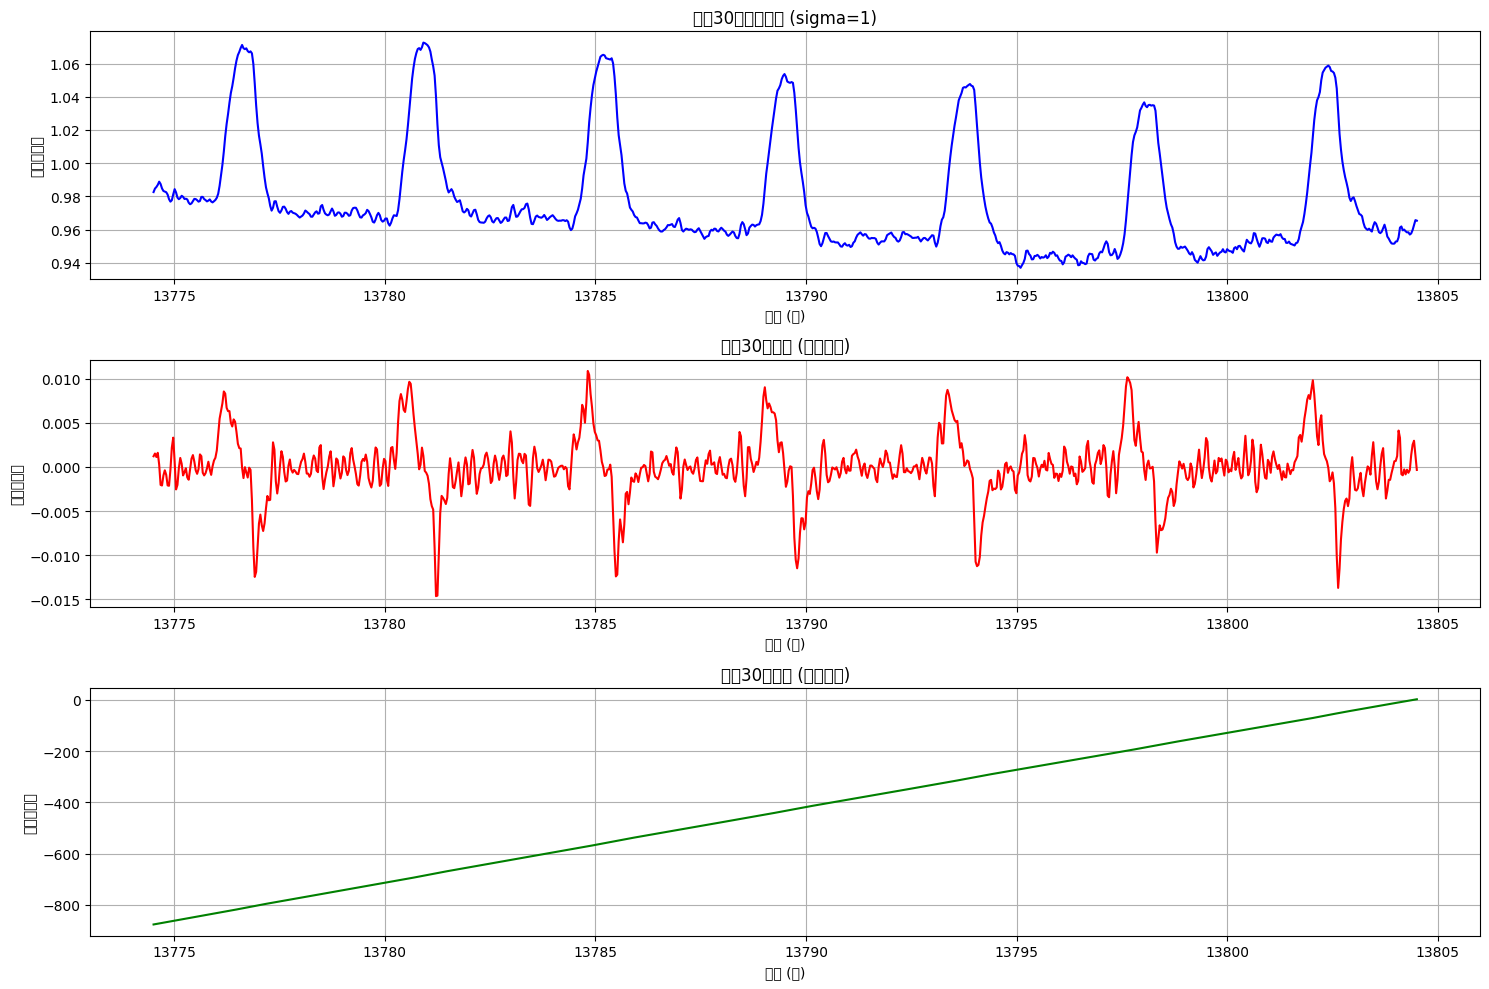

✅ 处理完成！


In [ ]:
##############################################################################
# 第二部分：处理用户选择的时间范围并计算位移数据
##############################################################################

# 获取用户输入的时间范围
start_time_input = input("\n请输入第二部分开始时间 (HH:MM:SS, 直接回车表示从视频开始): ")
end_time_input = input("请输入第二部分结束时间 (HH:MM:SS, 直接回车表示到视频结束): ")

# 初始化视频参数
cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 计算开始和结束帧
part2_start_frame = 0
part2_end_frame = total_frames - 1

if start_time_input:
    start_seconds = time_to_seconds(start_time_input)
    part2_start_frame = seconds_to_frame(start_seconds, fps)

if end_time_input:
    end_seconds = time_to_seconds(end_time_input)
    part2_end_frame = seconds_to_frame(end_seconds, fps)

print(f"第二部分处理范围: 帧 {part2_start_frame} 到 {part2_end_frame} (FPS: {fps:.2f})")

# 设置起始帧
cap.set(cv2.CAP_PROP_POS_FRAMES, part2_start_frame)

# 初始化数据结构
avg_d_values = []
frame_times = []
frame_count = part2_start_frame

# 初始化光流跟踪
ret, frame = cap.read()
if not ret:
    raise ValueError("无法读取视频帧")

gray_prev = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# 仅保留筛选点的初始位置
selected_indices = [i for i, pid in enumerate(current_ids) if pid in selected_ids]
if selected_indices:
    p0_filtered = initial_positions[selected_indices]
else:
    p0_filtered = None
    print("警告：没有选择有效的点ID！")

# 主处理循环
frame_count = part2_start_frame
total_frames_part2 = part2_end_frame - part2_start_frame + 1
processed_frames = 0

while cap.isOpened() and frame_count <= part2_end_frame:
    ret, frame = cap.read()
    if not ret:
        break

    current_time = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    if p0_filtered is not None and len(p0_filtered) > 0:
        p1, st, _ = cv2.calcOpticalFlowPyrLK(gray_prev, gray, p0_filtered, None, **lk_params)
    else:
        p1, st = None, None

    # 计算位移
    frame_dd = []
    if p1 is not None and st is not None:
        valid = st.ravel() == 1
        good_new = p1[valid]
        good_old = p0_filtered[valid]

        # 计算位移
        delta_x = good_new[:, 0, 0] - initial_positions[selected_indices][valid][:, 0, 0]
        delta_y = good_new[:, 0, 1] - initial_positions[selected_indices][valid][:, 0, 1]
        delta_d = np.sqrt(delta_x**2 + delta_y**2)

        # 记录位移数据
        frame_dd = delta_d.tolist()
        avg_d = np.mean(delta_d) if len(delta_d) > 0 else 0.0
    else:
        avg_d = 0.0

    avg_d_values.append(avg_d)
    frame_times.append(current_time)

    # 更新前一帧数据
    gray_prev = gray.copy()
    if p0_filtered is not None and len(p0_filtered) > 0:
        p0_filtered = good_new.reshape(-1, 1, 2) if valid is not None and sum(valid) > 0 else None

    # 进度显示 - 每5000帧显示一次（从第10帧开始）
    current_absolute_frame = frame_count
    if current_absolute_frame % 5000 == 10:
        processed_frames = current_absolute_frame - part2_start_frame + 1
        percentage = (processed_frames / total_frames_part2) * 100
        print(f"处理进度: 绝对帧 {current_absolute_frame} (第二部分: {processed_frames}/{total_frames_part2}, {percentage:.1f}%)")

    frame_count += 1

cap.release()

##############################################################################
# 数据处理和保存
##############################################################################

# 应用Z-score归一化
print("应用Z-score归一化...")
avg_d_values = np.array(avg_d_values)
mu = np.mean(avg_d_values)
sig = np.std(avg_d_values) + 1e-8  # 添加小常数避免除零错误
avg_d_values_normalized = (avg_d_values - mu) / sig

# 应用高斯滤波
d_smoothed = gaussian_filter1d(avg_d_values_normalized, sigma=SIGMA)

# 计算flow (梯度)
flow = np.gradient(d_smoothed)

# 计算volume (累积积分)
volume = cumulative_trapezoid(d_smoothed, initial=0)

# 从视频路径中提取测试编号
test_match = re.search(r'Ventilator Test (\d+)', input_video_path)
test_number = test_match.group(1) if test_match else "unknown"
print(f"检测到测试编号: {test_number}")

# 创建输出目录
output_dir = "/content/drive/MyDrive/flow & volume npy files"
!mkdir -p "{output_dir}"

# 生成文件名
flow_filename = f"{output_dir}/flow_data_{test_number}.npy"
volume_filename = f"{output_dir}/volume_data_{test_number}.npy"
d_smoothed_filename = f"{output_dir}/d_smoothed_{test_number}.npy"
frame_times_filename = f"{output_dir}/frame_times_{test_number}.npy"

# 保存数据 - 只存储需要的四个文件
np.save(flow_filename, flow)
np.save(volume_filename, volume)
np.save(d_smoothed_filename, d_smoothed)
np.save(frame_times_filename, np.array(frame_times))

# 获取数据长度信息
data_length = len(frame_times)
d_smoothed_shape = d_smoothed.shape
flow_shape = flow.shape
volume_shape = volume.shape

print("数据处理完成并已保存为npy文件:")
print(f"- {flow_filename} (形状: {flow_shape})")
print(f"- {volume_filename} (形状: {volume_shape})")
print(f"- {d_smoothed_filename} (形状: {d_smoothed_shape})")
print(f"- {frame_times_filename} (长度: {data_length})")

# 绘制结果 - 只显示最后30秒数据
if data_length > 0:
    # 确定最后30秒的起始索引
    if data_length > 1:
        total_duration = frame_times[-1] - frame_times[0]
        last_30s_start = max(0, frame_times[-1] - 30)

        # 找到最后30秒的起始索引
        start_index = next((i for i, t in enumerate(frame_times) if t >= last_30s_start), 0)

        # 提取最后30秒的数据
        frame_times_30s = frame_times[start_index:]
        d_smoothed_30s = d_smoothed[start_index:]
        flow_30s = flow[start_index:]
        volume_30s = volume[start_index:]

        # 创建图表
        plt.figure(figsize=(15, 10))

        # 位移图
        plt.subplot(3, 1, 1)
        plt.plot(frame_times_30s, d_smoothed_30s, 'b-')
        plt.title(f'最后30秒平滑位移 (sigma={SIGMA})')
        plt.xlabel('时间 (秒)')
        plt.ylabel('归一化位移')
        plt.grid(True)

        # 流量图
        plt.subplot(3, 1, 2)
        plt.plot(frame_times_30s, flow_30s, 'r-')
        plt.title('最后30秒流量 (位移梯度)')
        plt.xlabel('时间 (秒)')
        plt.ylabel('归一化流量')
        plt.grid(True)

        # 体积图
        plt.subplot(3, 1, 3)
        plt.plot(frame_times_30s, volume_30s, 'g-')
        plt.title('最后30秒体积 (累积积分)')
        plt.xlabel('时间 (秒)')
        plt.ylabel('归一化体积')
        plt.grid(True)

        plt.tight_layout()
        plt.show()
    else:
        print("数据不足，无法绘制图表")
else:
    print("没有有效数据可供绘制")

print("✅ 处理完成！")